# Lead Scoring - Logistic Regression Model

### Problem Statement:
X Education faces a challenge with a low lead conversion rate of around 30%. The company receives a large number of leads, but not all of them convert into paying customers. The goal is to improve this conversion rate by identifying the "Hot Leads," which are the leads most likely to convert into customers. By focusing on these potential leads, X Education can optimize its sales efforts and improve efficiency.

The task is to build a logistic regression model that will assign a lead score to each lead. This score will range from 0 to 100, where a higher score indicates a higher likelihood of conversion (Hot Lead) and a lower score indicates a lower likelihood of conversion (Cold Lead). 

## 1. Importing and Understanding Data

In [4231]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4233]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4235]:
# Importing the leads dataset
lead_data = pd.read_csv("leads.csv")

In [4237]:
# display the necessary columns and rows
pd.reset_option('display.max_columns')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [4239]:
lead_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Data Cleaning and Preprocessing

### Data Quality Check

- Checking the shape of the data, statistics

In [4244]:
lead_data.shape

(9240, 37)

In [4246]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4248]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Missing values check

-Checking if the dataset has any null values

In [4252]:
#checking the null values
lead_data.isnull().mean()

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.155628
How did you hear about X Education               0.238853
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine      

In [4254]:
#checking for duplicates
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Data Preparation

- Dropping the fields like
 **Magazine,Receive More Updates About Our Courses,
 I agree to pay the amount through cheque,
 Update me on Supply Chain Content** and
 **Get updates on DM Content** as these fields have only one value and will not be useful for prediction.

In [4258]:
lead_data.drop(['Magazine', 'Receive More Updates About Our Courses','I agree to pay the amount through cheque'
                ,'Update me on Supply Chain Content','Get updates on DM Content'], axis=1, inplace=True)

In [4260]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

### Handling NULL/Missing Values

- Dropping the columns like **Lead Quality, Asymmetrique Activity Index, Asymmetrique Profile Index,
  Asymmetrique Activity Score,Asymmetrique Profile Score,** **Lead Profile** and **tags** as it has more than 30% missing values.
- **Lead Source** also has 39% missing values. But it is an important field in terms of business context. So imputing it with 'Unknown' as the missing data is huge and dont want to introduce bias.
- Missing vaues in **Last Activity** field is imputed with 'Unknown'
- Missing values in **Country** is imputed with 'India' as more than 95% of the values in the dataset has country as India.
- Missing values in **Specialization** is imputed with 'Not selected' as it has 15% of the data missing and dont want to introduce any bias.

- **How did you hear about X Education** has 23.8% null values and huge amount of data in select. So there is not enough variance in data and will not help in prediction. So dropping it.
- Missing values in **What is your current occupation** is imputed with 'Unknown'.
- Missing values in **What matters most to you in choosing a course** is imputed with 'Not selected'.
- Dropping the field **What matters most to you in choosing a course** as 29% of the data is missing and there is not enough variance in data
- Mising values in **City** are imputed with mode value.

- Dropping the rows where **TotalVisits** is missing.
  

In [4265]:
print(lead_data.isnull().mean() * 100)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [4267]:
# Dropping the fields with more than 30% missing values
lead_data.drop(['Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score'
               ,'Asymmetrique Profile Score','Lead Profile','Tags'], axis=1, inplace=True)

In [4269]:
# Looping over the categorical columns to calculate value counts as percentages
for column in lead_data.select_dtypes(include=['object']).columns:
        if lead_data[column].isnull().any():
         print(f"Value counts for {column} (in percentage):")
         value_counts_percent = lead_data[column].value_counts(normalize=True) * 100
         print(value_counts_percent)
         print("\n") 

Value counts for Lead Source (in percentage):
Lead Source
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: proportion, dtype: float64


Value counts for Last Activity (in percentage):
Last Activity
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead         

In [4271]:
#lead source has 39% missing values. but it is an important column in term of business. So we are imputing it with 'Unknown'
lead_data['Lead Source'] = lead_data['Lead Source'].fillna('Unknown')

In [4273]:
#Last Activity - Imputing it with 'Unknown'
lead_data['Last Activity'] = lead_data['Last Activity'].fillna('Unknown')

In [4275]:
# 95% of the country name is India. So imputing missing values with 'India'
lead_data['Country'] = lead_data['Country'].fillna('India')

In [4277]:
#specialization has some values in Select and 15.5% null values
lead_data['Specialization'] = lead_data['Specialization'].fillna('Not Selected')

In [4279]:
#Occupation 29%% null values so imputing with 'Unknown'
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].fillna('Unknown')

In [4281]:
# How did you hear about X Education has 23.8% null values and huge amount of data in select- there is not enough variance in data. So dropping it
lead_data.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [4283]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [4285]:
#dropping as there is no variance in data
lead_data.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [4287]:
#imputing the mode value for city
mode_value = lead_data['City'].mode()[0]
print(mode_value)
lead_data['City'] = lead_data['City'].fillna(mode_value)

Mumbai


In [4289]:
# Removing NaN TotalCharges rows
lead_data = lead_data[~np.isnan(lead_data['TotalVisits'])]

In [4291]:
#checking for null values
lead_data.isnull().mean()

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Inter

### Handling the select value in the data

- select option in the data doesnt provide any meaningful value. So assuming 'select' is populated when visitors doesnt select any option. So imputing the select fields as 'Not Selected'

In [4295]:
#city -  imputing the select with notselected
lead_data['City']=lead_data['City'].replace({'Select': 'Not Selected'})

In [4297]:
#imputing the select with notselected
lead_data['Specialization']=lead_data['Specialization'].replace({'Select': 'Not Selected'})

### Grouping the data

As some of the columns have large number of datapoints and low volume, we wre grouping them into 'Other' Category.

In [4301]:
#Removing X Education Forums
lead_data['X Education Forums'].value_counts(normalize=True)

X Education Forums
No     0.99989
Yes    0.00011
Name: proportion, dtype: float64

In [4303]:
#99% of the data has only yes. Not enough variance to make prediction.
lead_data.drop(['X Education Forums'], axis=1, inplace=True)

In [4305]:
# Loop over categorical columns and calculate value counts as percentages
for column in lead_data.select_dtypes(include=['object']).columns:
    if column != 'Prospect ID':
        print(f"Value counts for {column} (in percentage):")
        value_counts_percent = lead_data[column].value_counts(normalize=True) * 100
        print(value_counts_percent)
        print("\n")  # Adds a line break after each output

Value counts for Lead Origin (in percentage):
Lead Origin
Landing Page Submission    53.674613
API                        39.305723
Lead Add Form               6.679117
Lead Import                 0.340547
Name: proportion, dtype: float64


Value counts for Lead Source (in percentage):
Lead Source
Google               31.506097
Direct Traffic       27.935845
Olark Chat           19.257388
Organic Search       12.677139
Reference             4.866528
Welingak Website      1.417115
Referral Sites        1.373174
Facebook              0.340547
Unknown               0.318576
bing                  0.065912
google                0.054927
Click2call            0.043942
Social Media          0.021971
Live Chat             0.021971
Press_Release         0.021971
Pay per Click Ads     0.010985
blog                  0.010985
WeLearn               0.010985
welearnblog_Home      0.010985
youtubechannel        0.010985
testone               0.010985
NC_EDM                0.010985
Name: proportion, d

In [4307]:
#lead origin - Lead Add Form and Lead Import are grouped into 'Other Leads' due to their small proportion
lead_data['Lead Origin']=lead_data['Lead Origin'].replace({'Lead Add Form': 'Other Leads', 'Lead Import': 'Other Leads'})
lead_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3578
Other Leads                 639
Name: count, dtype: int64

In [4309]:
#Correction the improper case
lead_data['Lead Source']=lead_data['Lead Source'].replace({'google': 'Google'})

In [4311]:
#Lead Source - Grouping the sources apart from Google',Olark Chat,Organic Search,Reference as Other sources as their proportions are very low.
lead_data['Lead Source']=lead_data['Lead Source'].apply(lambda x: x if x in ['Google', 'Olark Chat', 'Organic Search', 'Reference'] else 'Other sources')

In [4313]:
lead_data['Lead Source'].value_counts()

Lead Source
Other sources     2880
Google            2873
Olark Chat        1753
Organic Search    1154
Reference          443
Name: count, dtype: int64

In [4315]:
#Last Activity and last notabe activity are similar columns so dropping one field
lead_data.drop(['Last Notable Activity'], axis=1, inplace=True)

In [4317]:
#Last activity - Grouping values with small proportions as Other activity
lead_data['Last Activity']=lead_data['Last Activity'].apply(lambda x: x if x in ['Email Opened', 'SMS Sent', 'Page Visited on Website', 'Converted to Lead', 'Email Bounced'] else 'Other activity')

In [4319]:
#country -Grouping other countries apart from India, United States, United Arab Emirates as others
lead_data['Country']=lead_data['Country'].apply(lambda x: x if x in ['India', 'United States', 'United Arab Emirates'] else 'Others')

In [4321]:
#Specialization -  Grouping values with small proportions as Other specialization
lead_data['Specialization']=lead_data['Specialization'].apply(lambda x: x if x in ['Not Selected', 'Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management','Business Administration','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance'] else 'Other specialization')

### Renaming the fields for better usability

In [4324]:
lead_data.rename(columns={'What is your current occupation': 'current_occupation'}, inplace=True)

In [4326]:
lead_data.rename(columns={'What matters most to you in choosing a course': 'factors_in_choosing_course'}, inplace=True)

In [4328]:
lead_data.rename(columns={'A free copy of Mastering The Interview': 'mastering_the_interview'}, inplace=True)

In [4330]:
#Mapping all the yes/no vars to 1/0
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article','Newspaper'
            ,'Digital Advertisement','Through Recommendations','mastering_the_interview']

# Defining the map function
def binary_map(x):
    return x.replace({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

## 3.EDA

In [4333]:
### Checking the lead conversion rate of the dataset
conversion= (sum(lead_data1['Converted'])/len(lead_data1['Converted'].index))*100
conversion

37.681970884658455

In [4335]:
#creating seperate numeraical and categorical arrays 
cat_cols=["Lead Origin","Lead Source","Last Activity","Country","Specialization","City","current_occupation","Do Not Email","Do Not Call","Search","Newspaper Article","Newspaper","Digital Advertisement","Through Recommendations","mastering_the_interview"]
#num_cols=["Do Not Email","Do Not Call","TotalVisits","Total Time Spent on Website","Page Views Per Visit","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","mastering_the_interview"]
num_cols=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

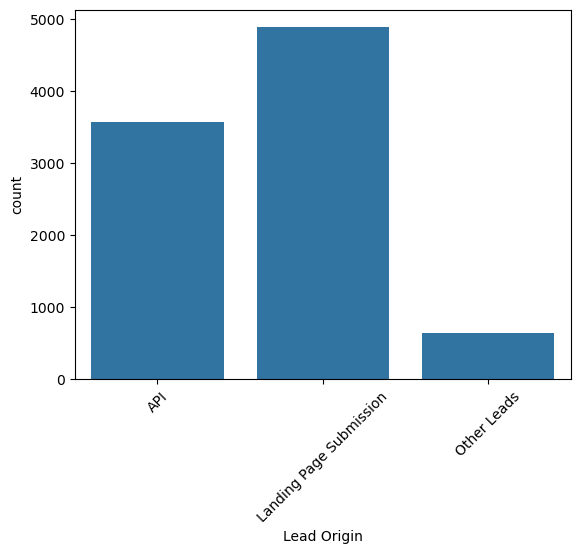

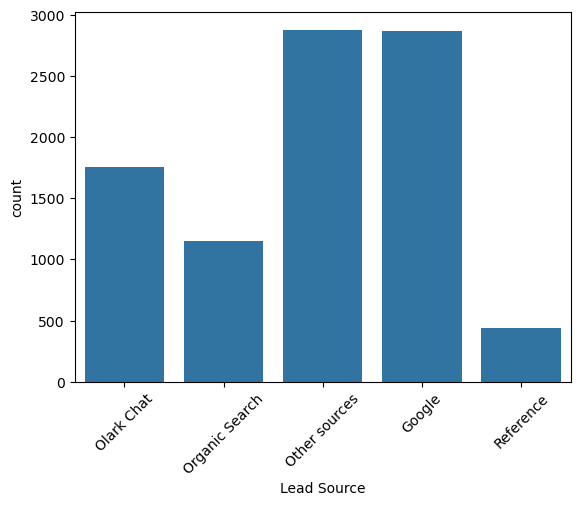

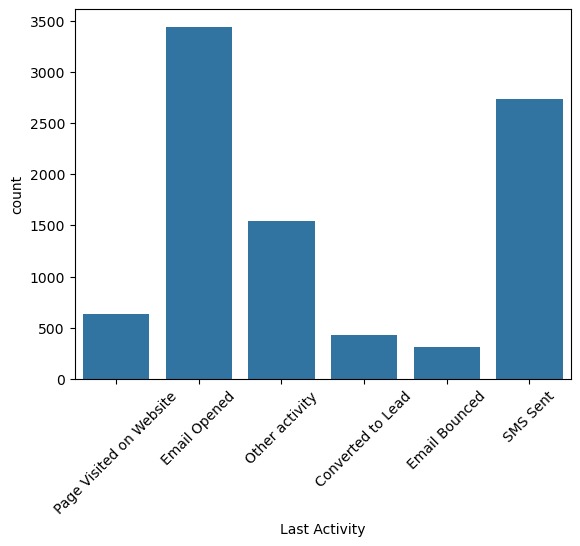

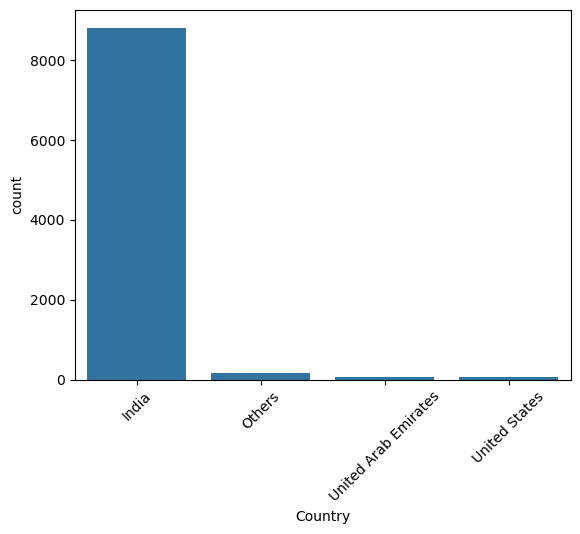

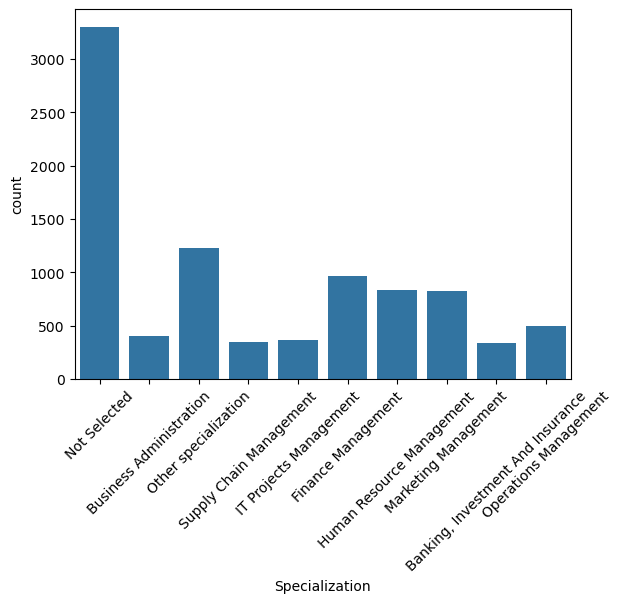

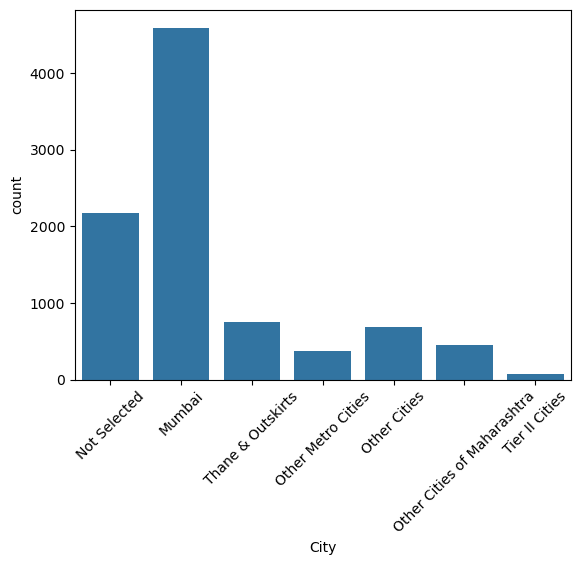

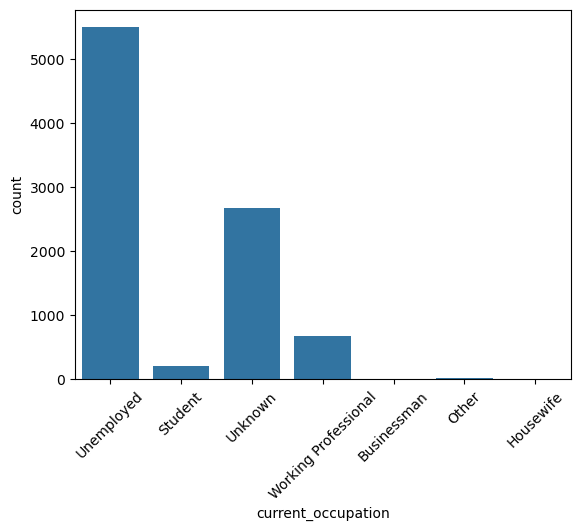

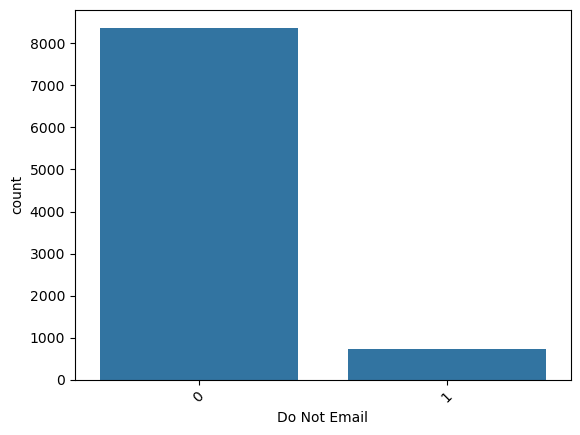

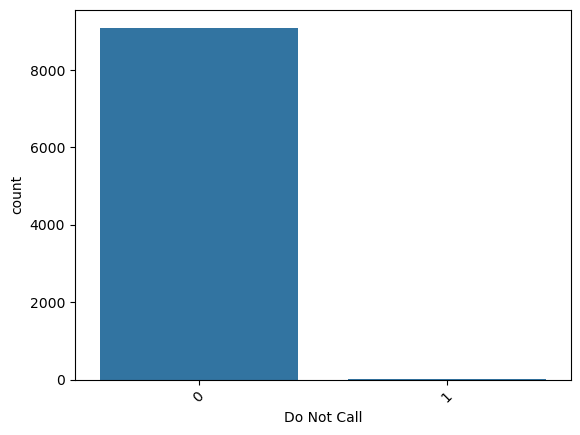

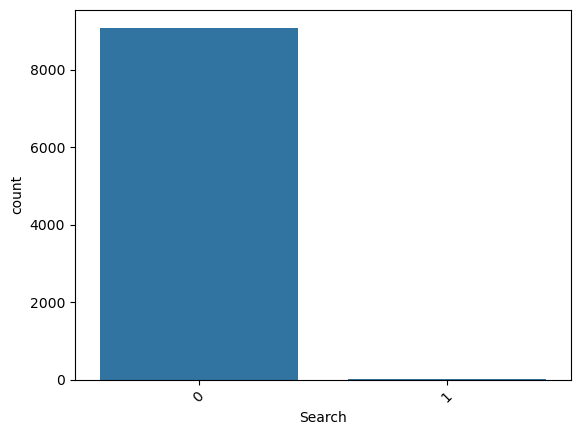

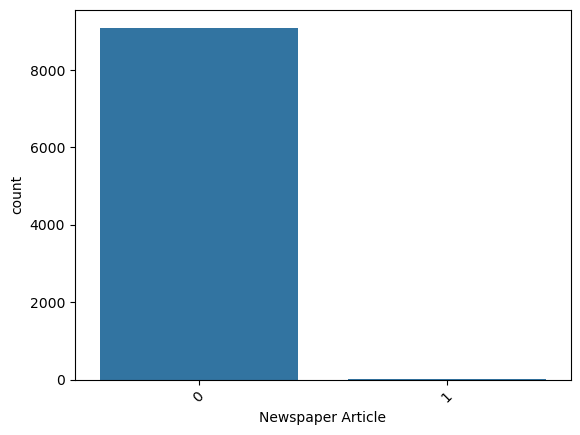

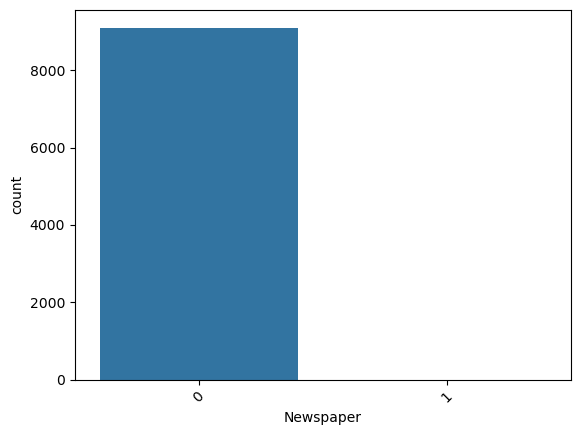

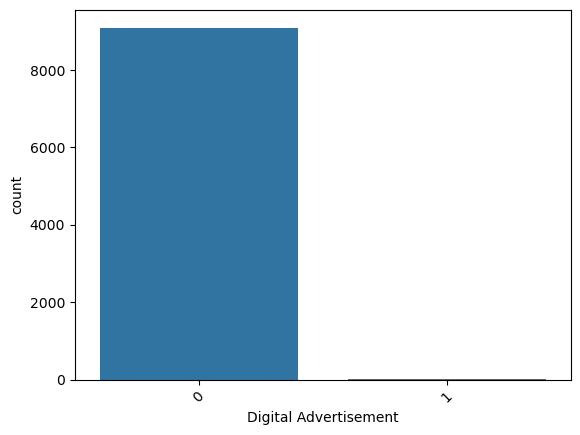

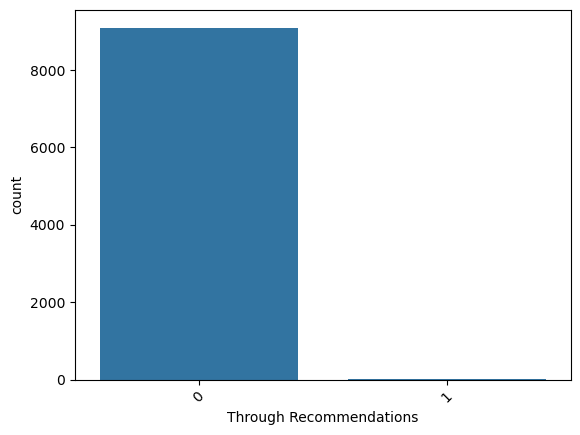

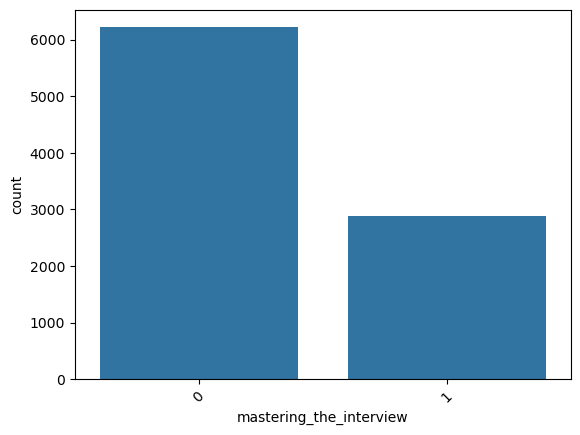

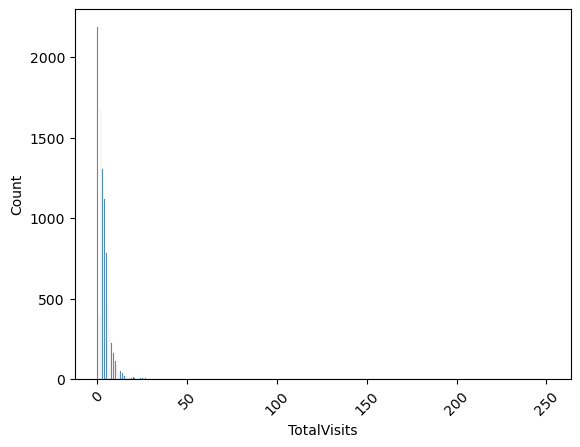

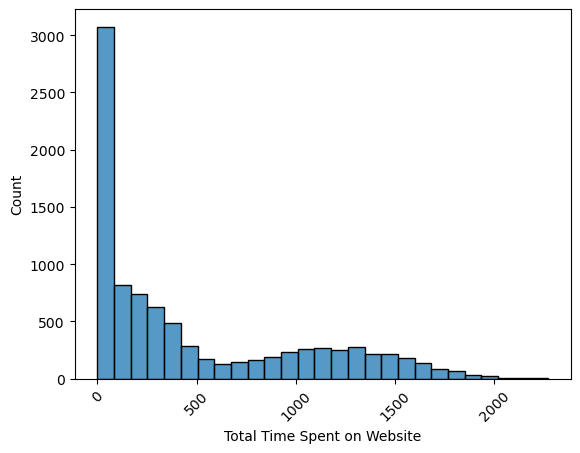

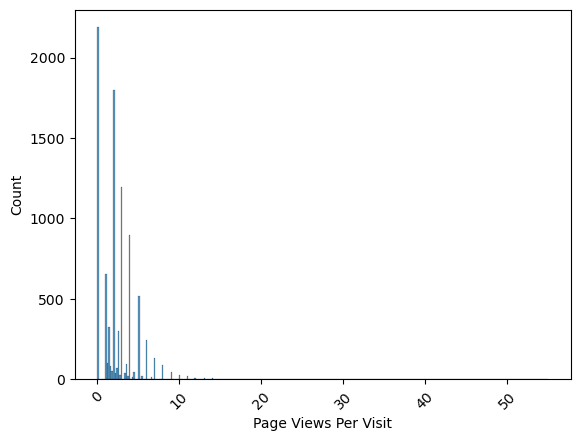

In [4337]:
# Univariate Analysis
for i in cat_cols:
    sns.countplot(x=lead_data[i])
    plt.xticks(rotation=45)
    plt.show()
for i in num_cols:
    sns.histplot(x=lead_data[i])
    plt.xticks(rotation=45)
    plt.show()

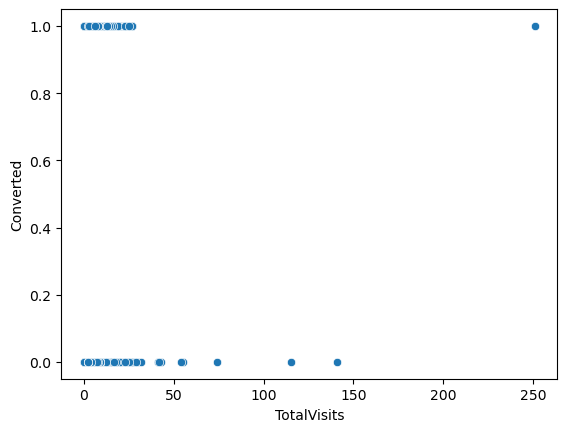

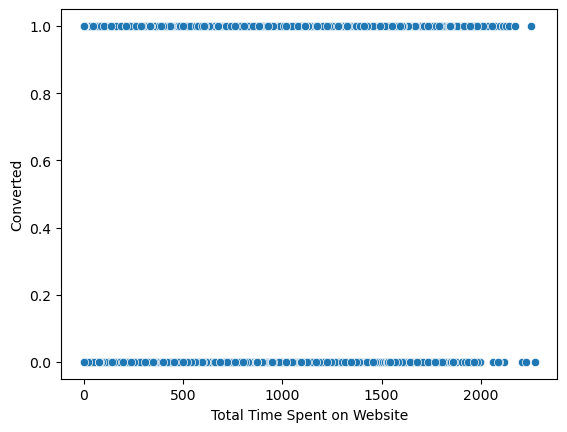

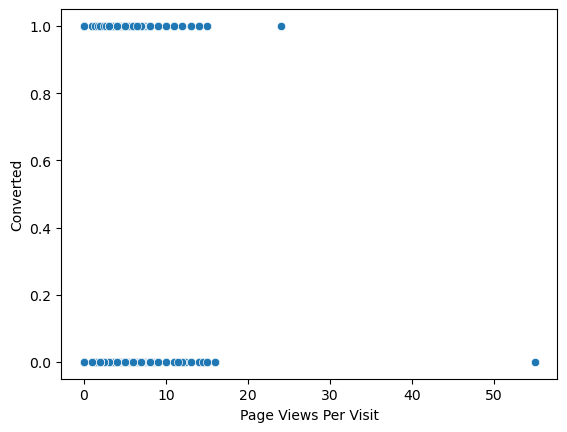

In [4338]:
# Bivariate Analysis
#sns.pairplot(df[num_cols])
#plt.show()
for i in num_cols:
    sns.scatterplot(x=lead_data[i],y=lead_data["Converted"])
    plt.show()

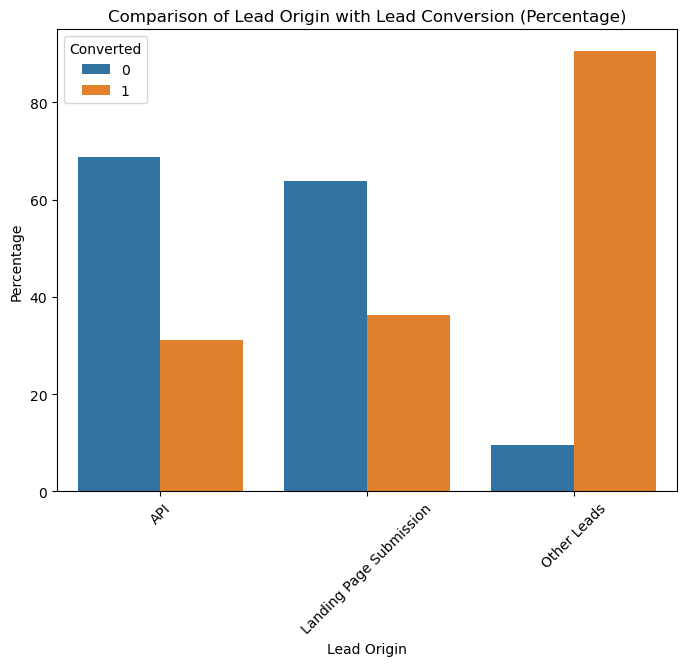

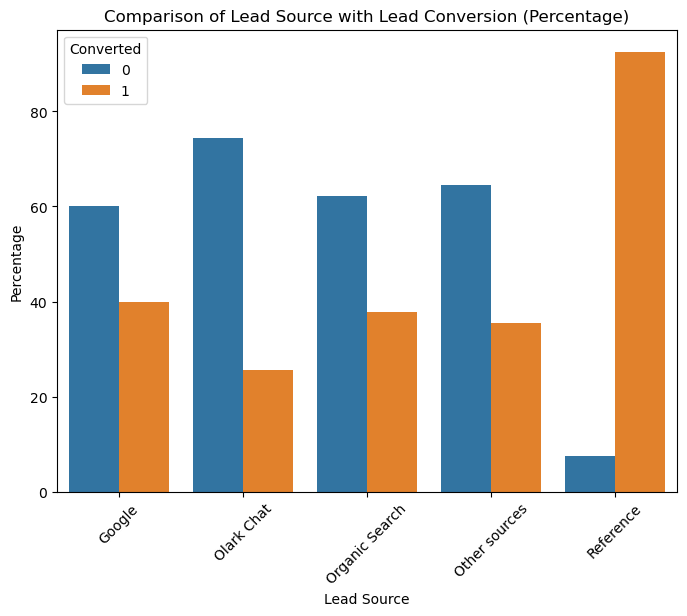

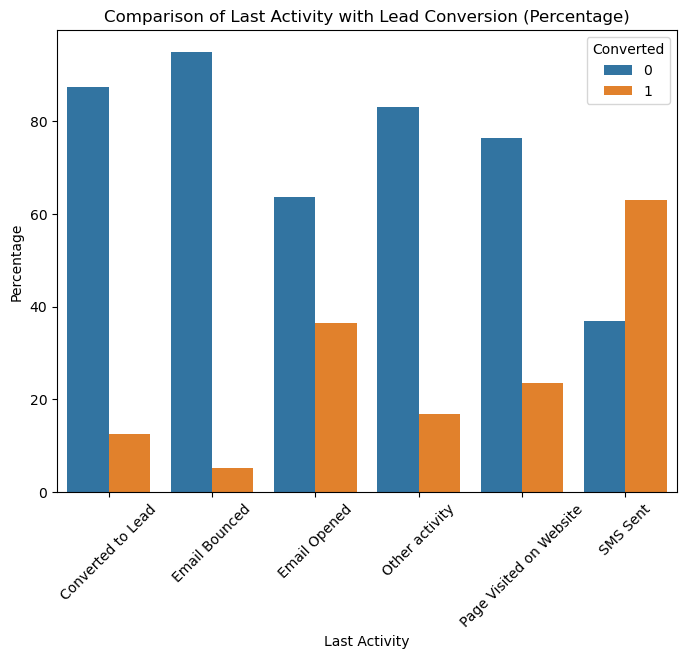

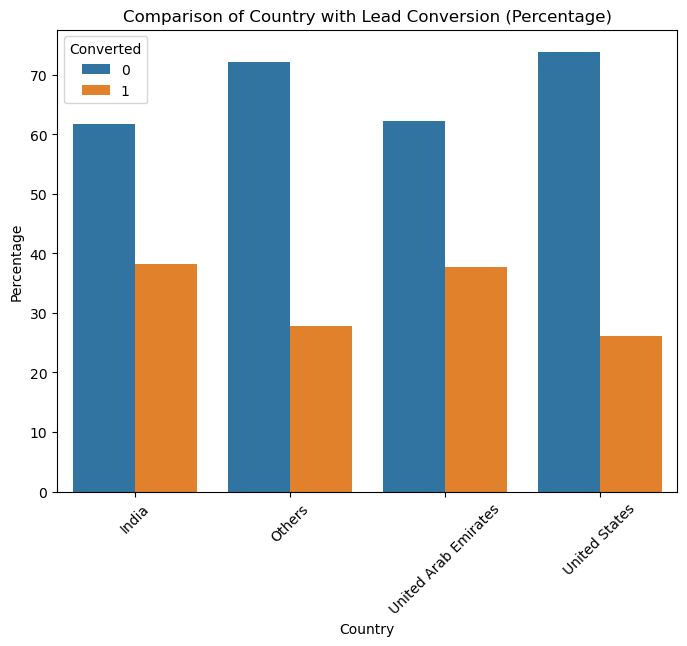

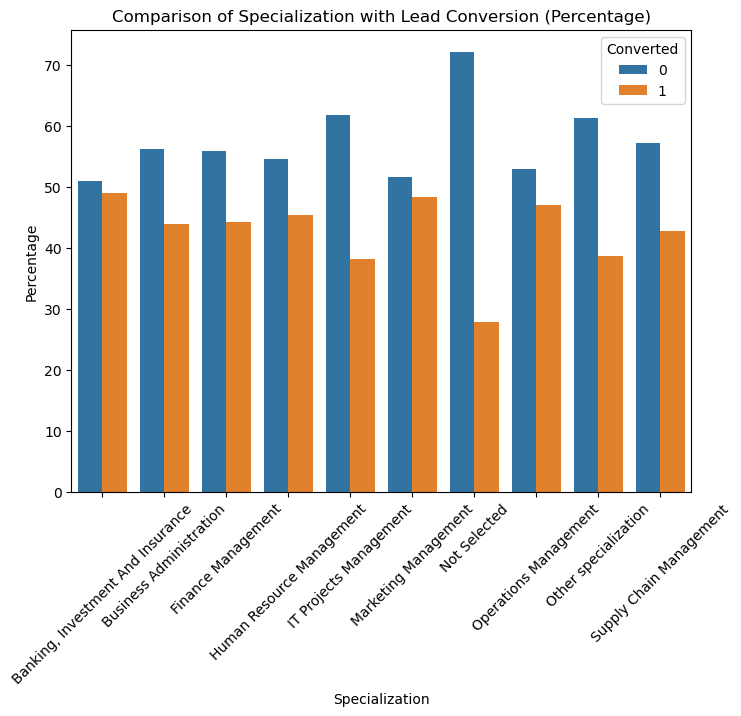

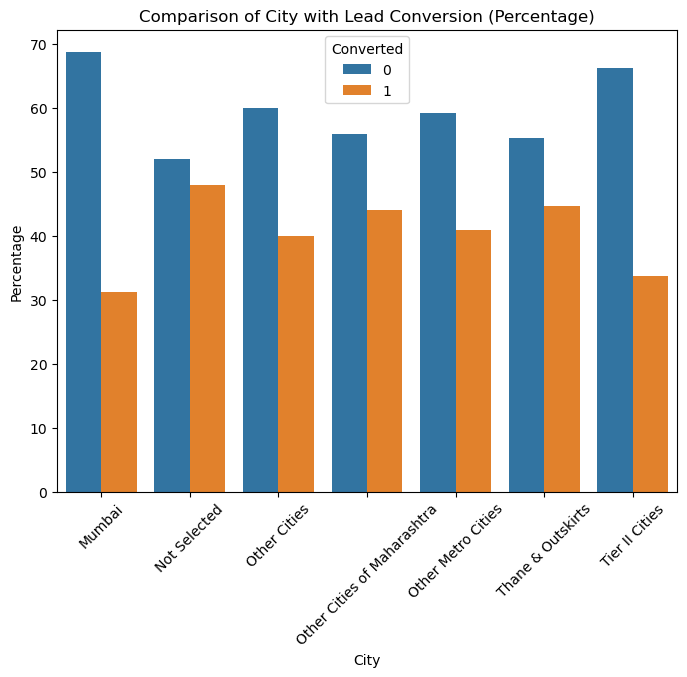

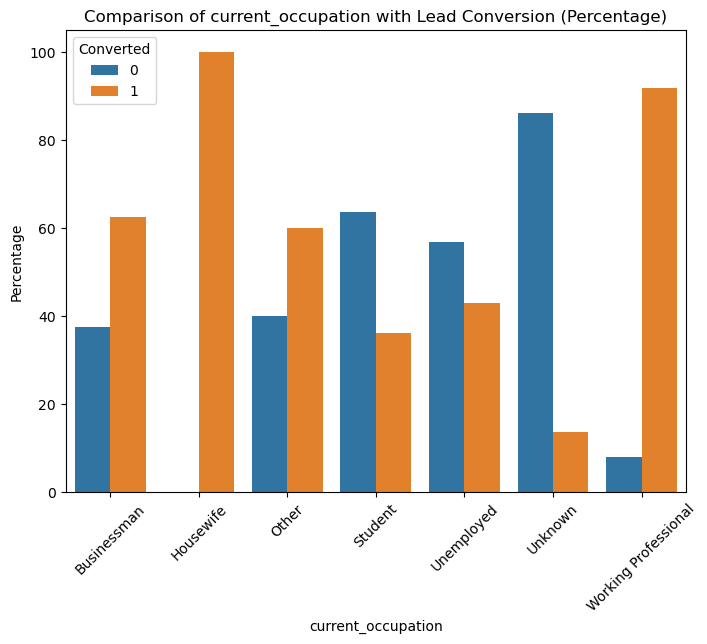

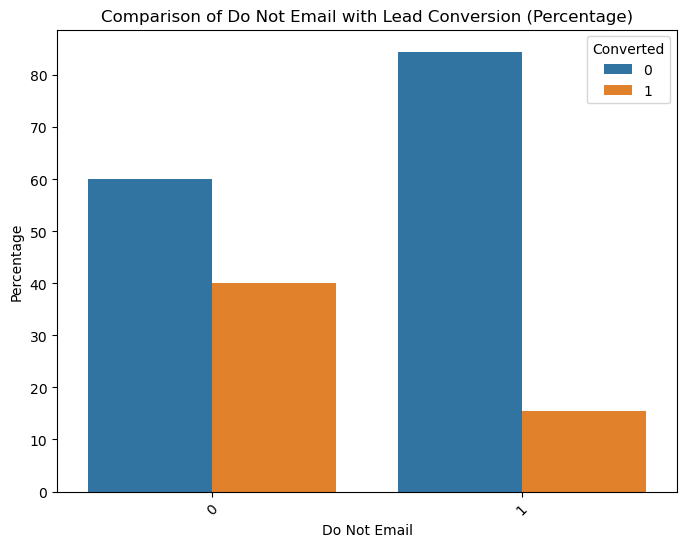

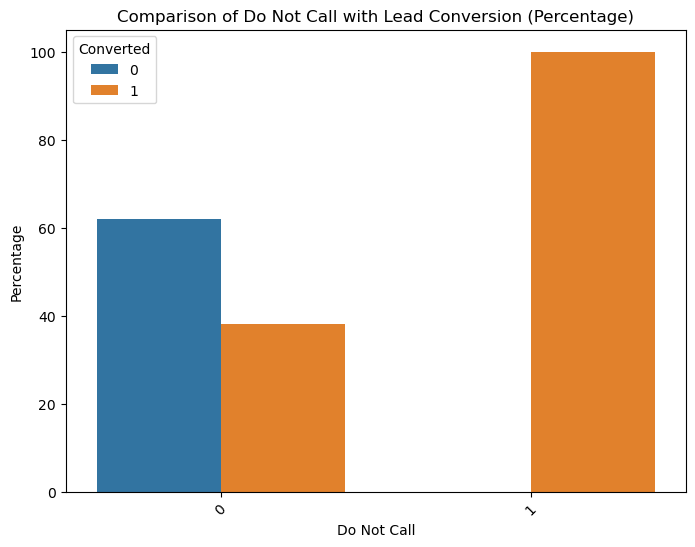

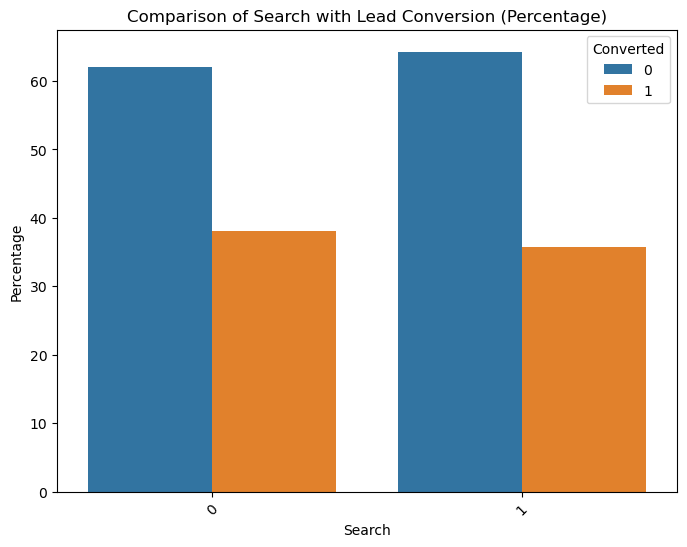

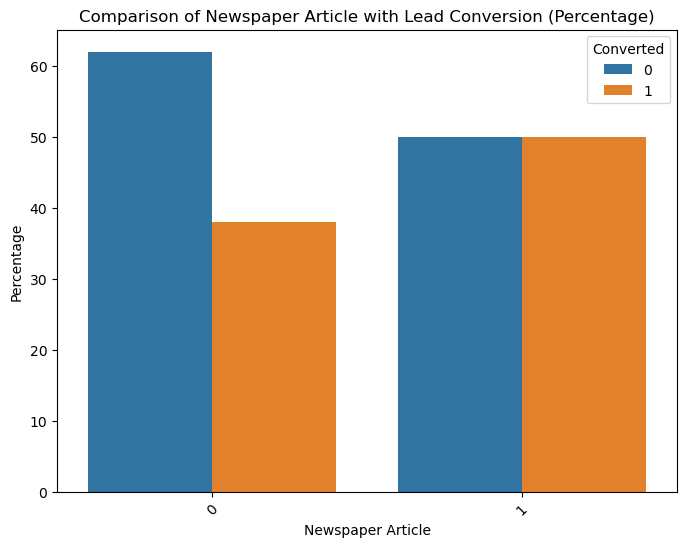

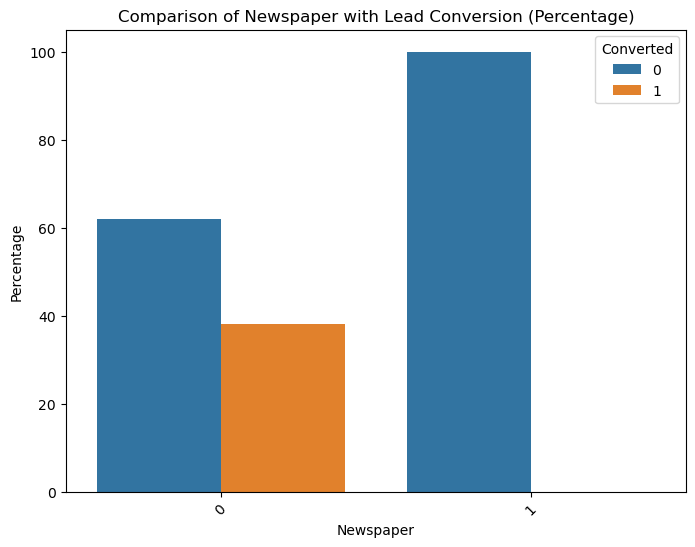

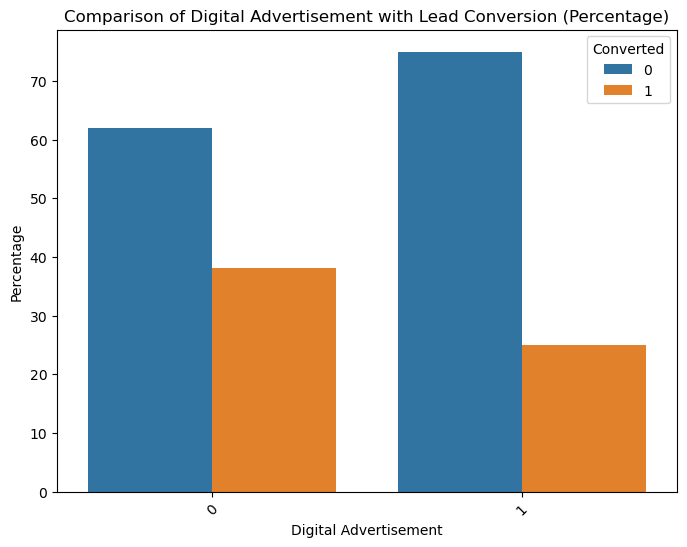

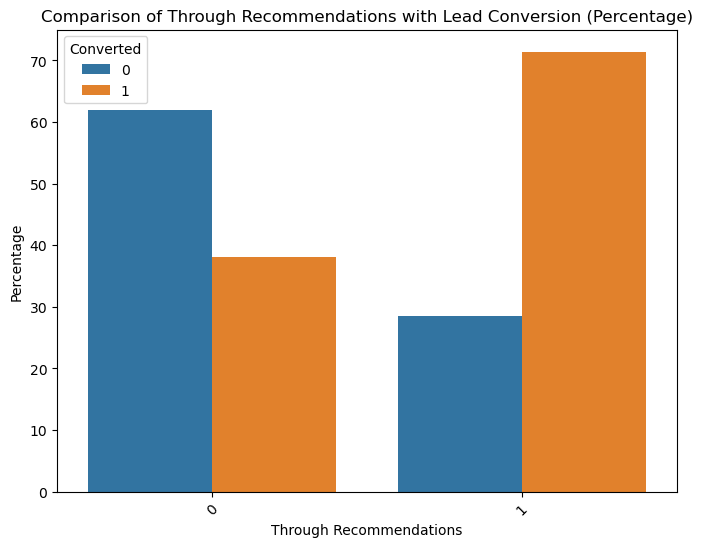

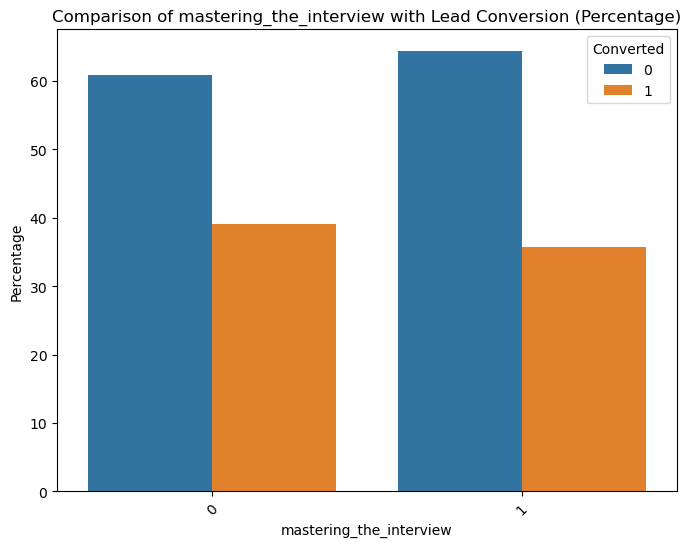

In [4339]:
for i in cat_cols:
    # Calculate the percentage for each category within 'Converted' for column 'i'
    temp = lead_data.groupby([i, 'Converted']).size().reset_index(name='Count')
    temp['Percentage'] = temp.groupby(i)['Count'].transform(lambda x: x / x.sum() * 100)
    
    plt.figure(figsize=(8, 6))
    
    # Plot the countplot, but adjust it to show percentage
    sns.barplot(x=i, y='Percentage', hue='Converted', data=temp)
    
    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45)
    
    # Add title and labels
    plt.title(f'Comparison of {i} with Lead Conversion (Percentage)')
    plt.xlabel(i)
    plt.ylabel('Percentage')
    
    # Display the plot
    plt.show()

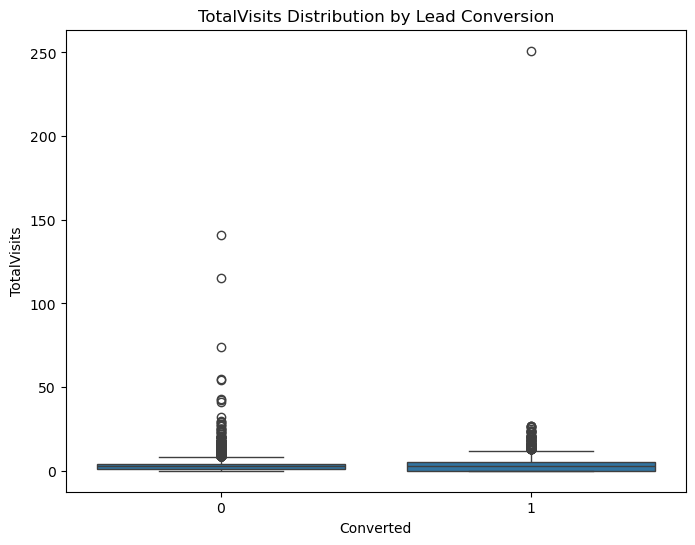

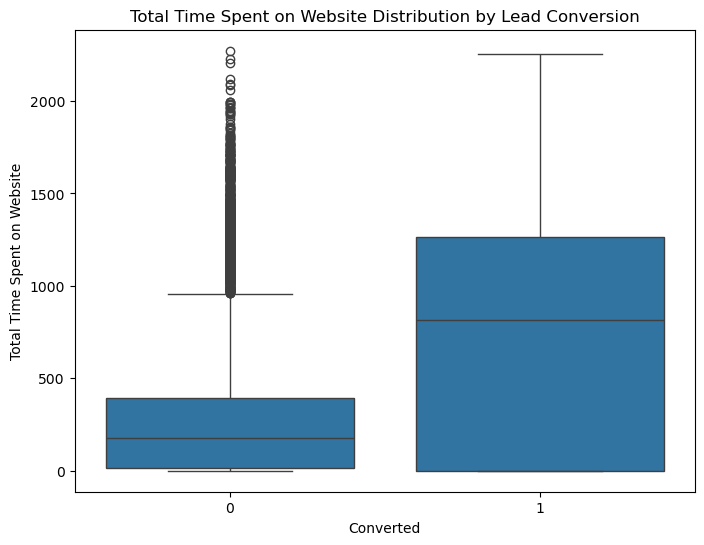

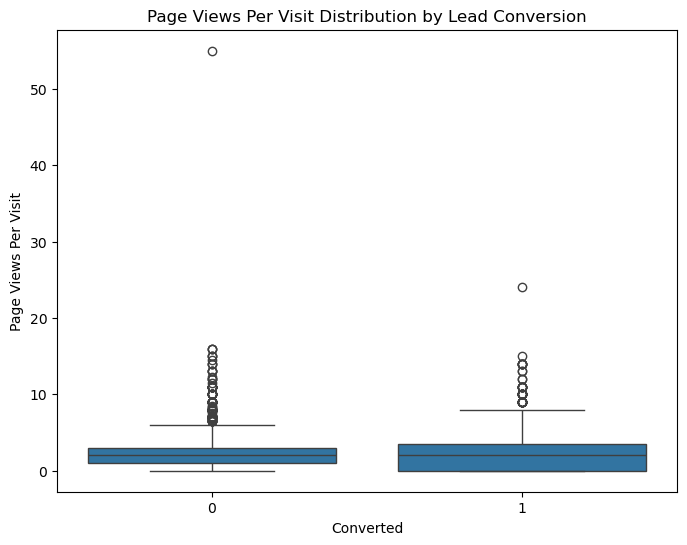

In [4340]:
for i in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Converted', y=i, data=lead_data)
    
    # Add title and labels
    plt.title(f'{i} Distribution by Lead Conversion')
    plt.xlabel('Converted')
    plt.ylabel(i)
    
    # Display the plot
    plt.show()

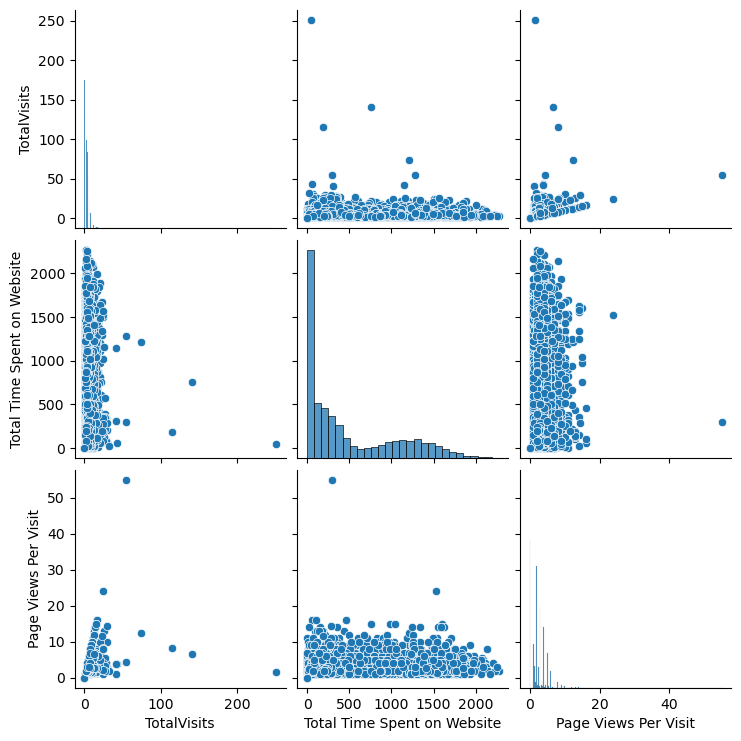

In [4341]:
  # Assuming 'num_cols' is your list of numerical columns
sns.pairplot(lead_data[num_cols])

In [4342]:
num_cols1=["Do Not Email","Do Not Call","TotalVisits","Total Time Spent on Website","Page Views Per Visit","Search","Newspaper Article","Newspaper","Digital Advertisement","Through Recommendations","mastering_the_interview"]

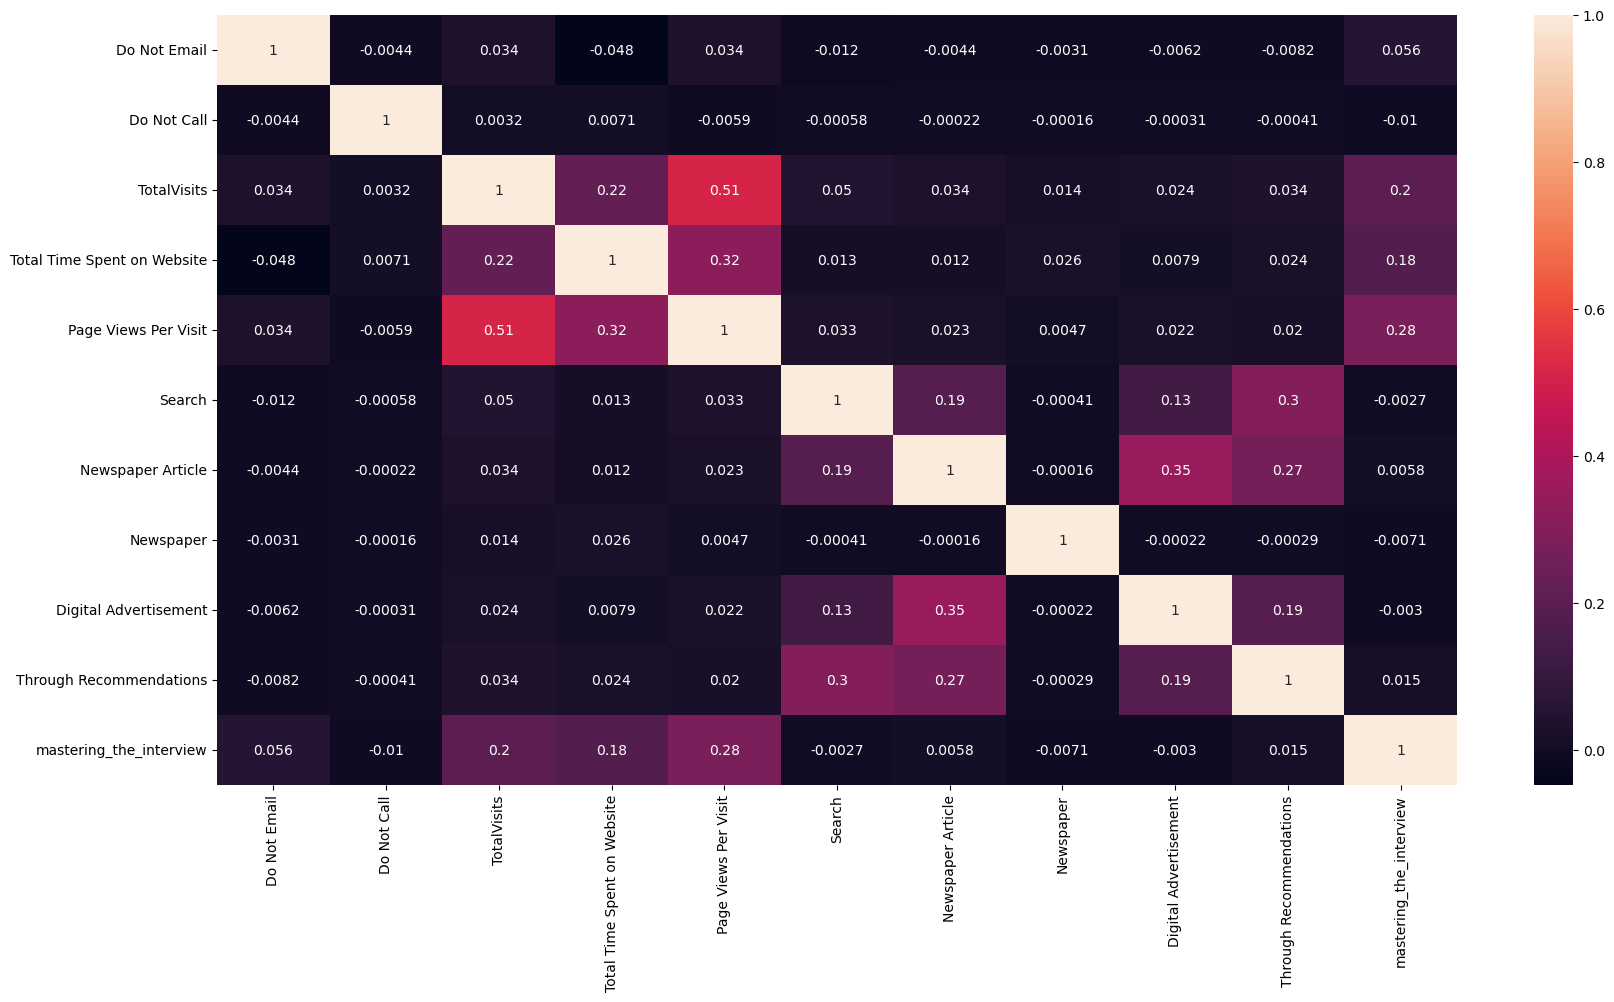

In [4343]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data[num_cols1].corr(),annot = True)
plt.show()

### EDA Highlights

1. Leads who come through other leads such as Lead Add Form and Lead Import are more likely to convert. Even though their volume is small, they will make quality leads.
2. Leads which comes through 'Refeerence' as source has a very high conversion rate.
3. Leads from United states have less conversion rate
4. LEads who has mentioned their specialization indicates high interest and are more likely to convert.
5. Working professional and Businessman have high conversion rate
6. Total visists and Page views per visit are highly correlated. So we will be dropping any one.

In [4350]:
lead_data.drop(['Page Views Per Visit'], axis=1, inplace=True)

### Outlier Handling

In [4352]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols1_check=lead_data[["TotalVisits","Total Time Spent on Website"]]

In [4353]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols1_check.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website
count,9103.000000,9103.000000
mean,3.445238,481.350104
std,4.854853,545.066142
min,0.000000,0.000000
25%,1.000000,9.000000
50%,3.000000,244.000000
75%,5.000000,919.500000
90%,7.000000,1372.000000
95%,10.000000,1556.900000
99%,17.000000,1838.960000


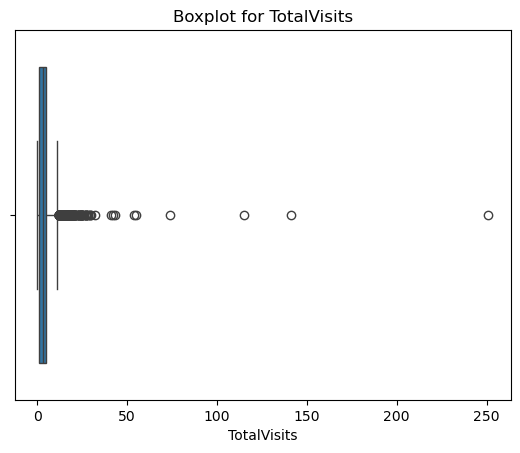

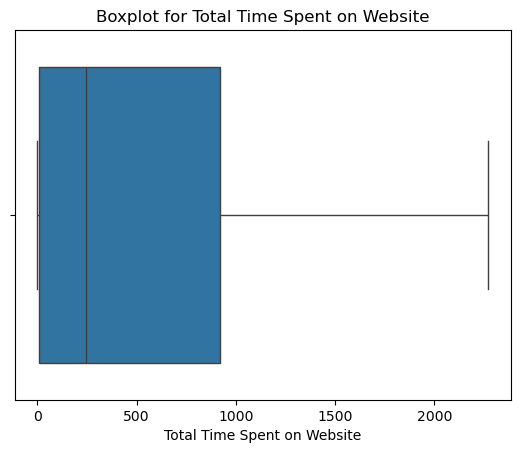

In [4354]:
for i in num_cols1_check:
    sns.boxplot(x=lead_data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [4355]:
#TotalVisits has significant outlier. Dropping all the values >17
lead_data= lead_data[~(lead_data['TotalVisits'] > 17)]

In [4356]:
#Total Time Spent on Website also has significant outlier. Dropping all the values >1838
lead_data= lead_data[~(lead_data['Total Time Spent on Website'] > 1838)]

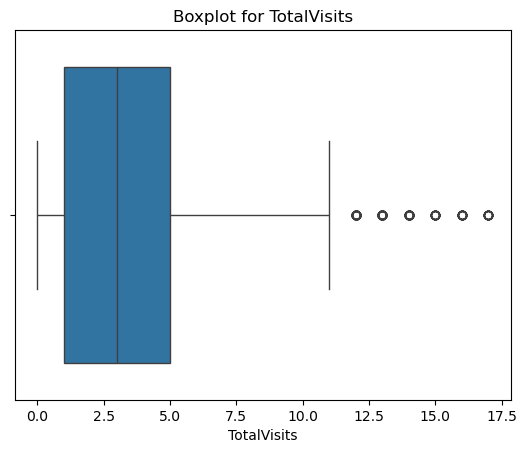

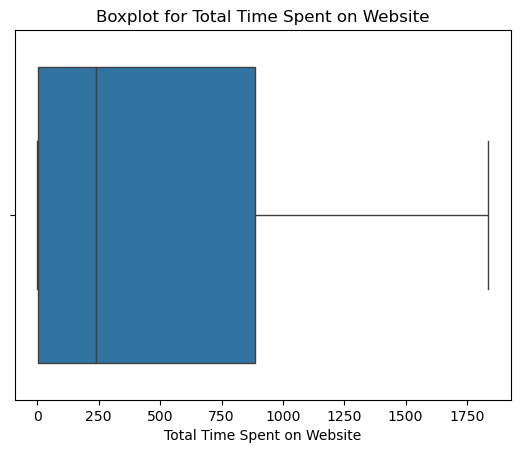

In [4357]:
for i in num_cols1_check:
    sns.boxplot(x=lead_data[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

# 4. Model Building

In [4359]:
#importing necessary libraries
from sklearn.model_selection import train_test_split

In [4360]:
cat_cols=["Lead Origin","Lead Source","Last Activity","Country","Specialization","City","current_occupation"]

### Creation of dummy variables for categorical variables

In [4362]:
#Creation of dummy variables using one-hot encoding
lead_data1=pd.get_dummies(lead_data,columns=["Lead Origin","Lead Source","Last Activity"],drop_first=True,dtype=int)

In [4365]:
lead_data1.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Country,Specialization,current_occupation,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,City,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,India,Not Selected,Unemployed,0,0,0,0,0,Not Selected,0,0,0,1,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,India,Not Selected,Unemployed,0,0,0,0,0,Not Selected,0,0,0,0,1,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,India,Business Administration,Student,0,0,0,0,0,Mumbai,1,1,0,0,0,1,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,India,Other specialization,Unemployed,0,0,0,0,0,Mumbai,0,1,0,0,0,1,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,India,Not Selected,Unemployed,0,0,0,0,0,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0


In [4366]:

# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(lead_data1["current_occupation"], prefix="current_occupation",drop_first=True,dtype=int)
# Dropping Others column
ml1 = ml.drop(["current_occupation_Other"], axis=1)
#Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1,ml1], axis=1)


In [4367]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(lead_data1["Country"], prefix="Country",drop_first=True,dtype=int)
# Dropping Others column
ml1 = ml.drop(["Country_Others"], axis=1)
#Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1,ml1], axis=1)

In [4369]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(lead_data1["Specialization"], prefix="Specialization",drop_first=True,dtype=int)
# Dropping Others column
ml1 = ml.drop(["Specialization_Not Selected"], axis=1)
#ml1 = ml.drop(["Specialization_Other specialization"], axis=1)
#Adding the results to the master dataframe
lead_data1 = pd.concat([lead_data1,ml1], axis=1)

In [4370]:
# Creating dummy variables for city
lead_data1=pd.get_dummies(lead_data1,columns=["City"],drop_first=True,dtype=int)

In [4373]:
# Check if each column exists and drop it if it does
col=['current_occupation','Country','Specialization']

for column in col:
    if column in lead_data1.columns:
        lead_data1.drop(column, axis=1, inplace=True)

In [4375]:
#lead_data1 = lead_data1.drop(["current_occupation","Country","Specialization"], axis=1)

In [4379]:
# Putting feature variable to X
X = lead_data1.drop(['Prospect ID','Lead Number','Converted'], axis=1)


In [4380]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8930 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              8930 non-null   int64  
 1   Do Not Call                               8930 non-null   int64  
 2   TotalVisits                               8930 non-null   float64
 3   Total Time Spent on Website               8930 non-null   int64  
 4   Search                                    8930 non-null   int64  
 5   Newspaper Article                         8930 non-null   int64  
 6   Newspaper                                 8930 non-null   int64  
 7   Digital Advertisement                     8930 non-null   int64  
 8   Through Recommendations                   8930 non-null   int64  
 9   mastering_the_interview                   8930 non-null   int64  
 10  Lead Origin_Landing Page Submission      

In [4384]:
# Putting response variable to y
y = lead_data1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Test-Train Split

In [4392]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [4395]:
from sklearn.preprocessing import StandardScaler

## Scaling

Scaling the numeric variables for better interpretability.

In [4401]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Unknown,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3441,0,0,-1.064337,-0.886451,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9003,0,0,-1.064337,-0.886451,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7155,0,0,-0.064762,0.088710,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1549,0,0,-0.397954,0.897241,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
557,0,0,-1.064337,-0.886451,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4402]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

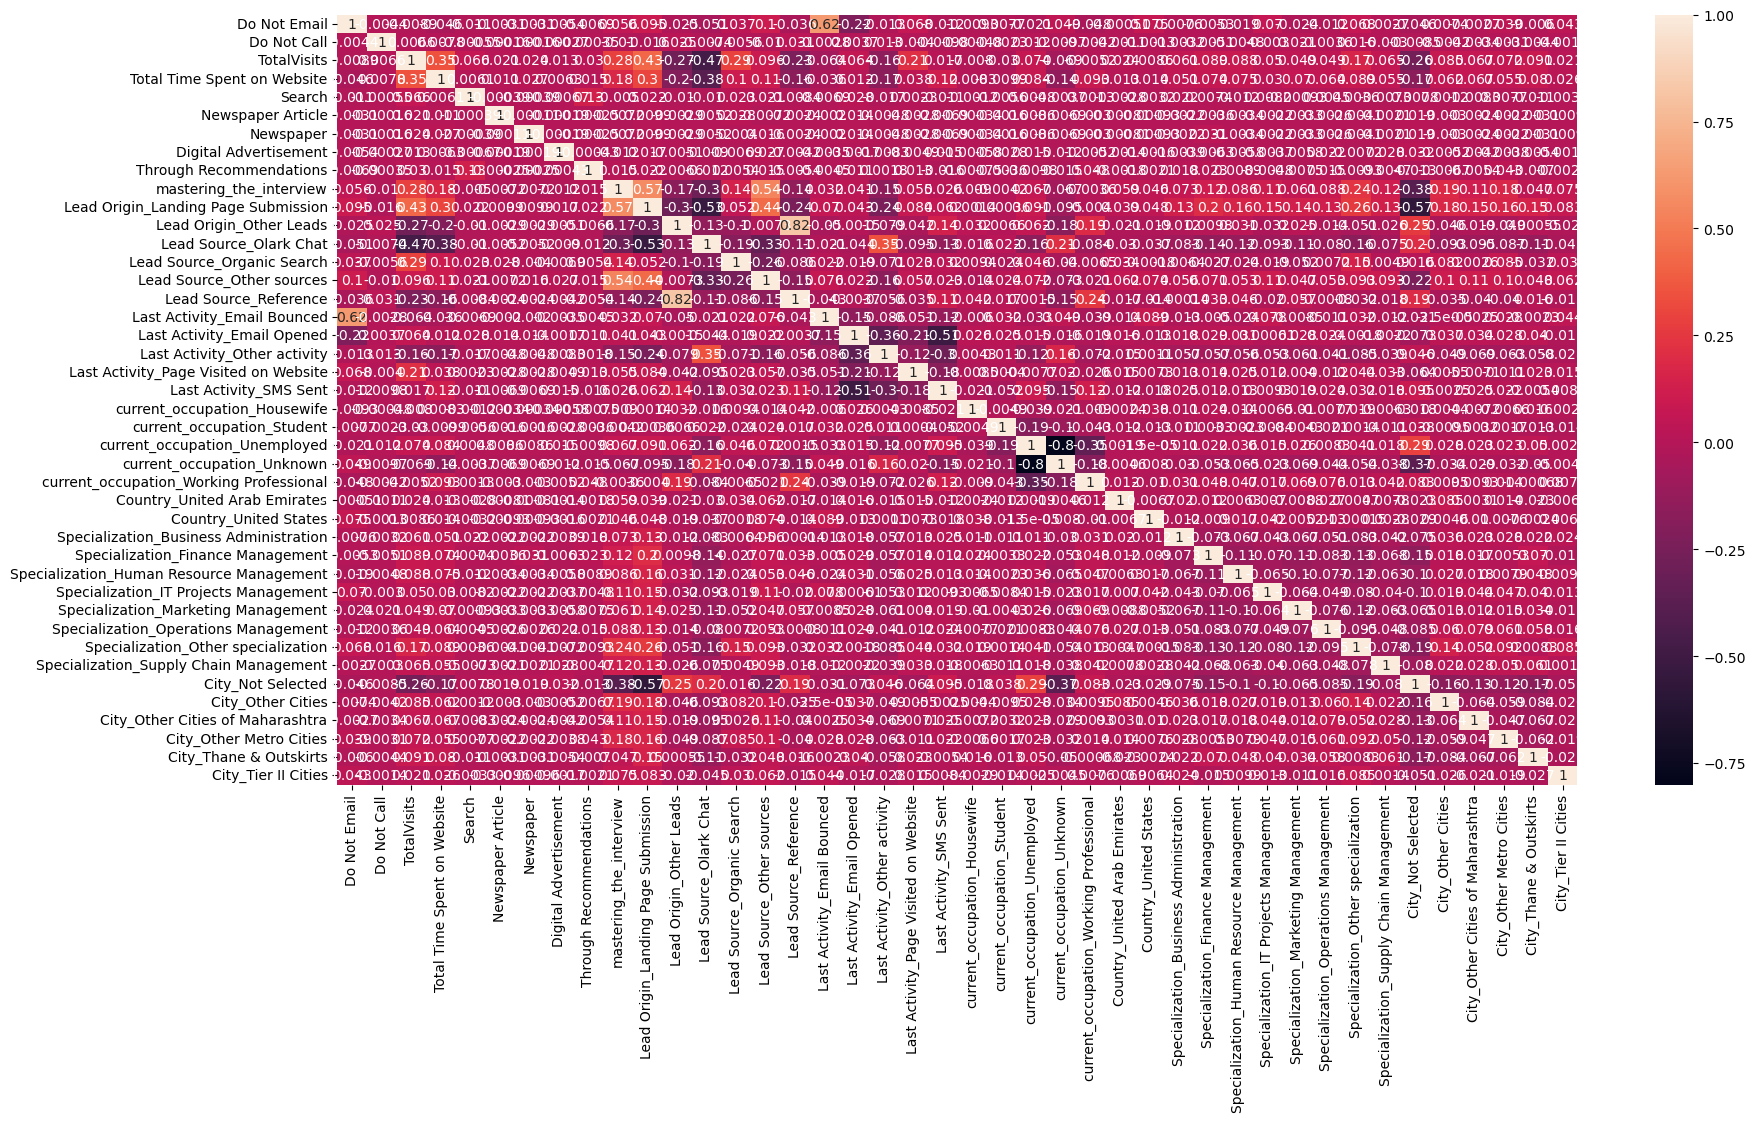

In [4405]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

### Building the Model 
Let's start by splitting our data into a training set and a test set.

In [4409]:
import statsmodels.api as sm

In [4410]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6251 entries, 3441 to 5836
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              6251 non-null   int64  
 1   Do Not Call                               6251 non-null   int64  
 2   TotalVisits                               6251 non-null   float64
 3   Total Time Spent on Website               6251 non-null   float64
 4   Search                                    6251 non-null   int64  
 5   Newspaper Article                         6251 non-null   int64  
 6   Newspaper                                 6251 non-null   int64  
 7   Digital Advertisement                     6251 non-null   int64  
 8   Through Recommendations                   6251 non-null   int64  
 9   mastering_the_interview                   6251 non-null   int64  
 10  Lead Origin_Landing Page Submission   

In [4411]:
# Logistic regression model - model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6209
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.3
Date:                Mon, 17 Mar 2025   Deviance:                       5054.6
Time:                        16:08:17   Pearson chi2:                 6.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2609      0.658     -1.916      0.055      -2.551       0.029
Do Not Email                                -1.0160      0.193     -5.268      0.000      -1.394      -0.638
Do Not Call                                 21.4907   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                  0.2079      0.047      4.461      0.000       0.117       0.299
Total Time Spent on Website                  1.1392      0.042     27.005      0.000       1.057       1.222
Search                                      -0.5541      0.900     -0.616      0.538      -2.318       1.210
Newspaper Article                        -1.056e-09   1.71e-06     -0.001      1.000   -3.35e-06    3.35e-06
Newspaper                                  -24.6137   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                       21.7517   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Through Recommendations                      0.9693      1.720      0.564      0.573      -2.401       4.340
mastering_the_interview                     -0.0977      0.111     -0.879      0.379      -0.316       0.120
Lead Origin_Landing Page Submission         -0.7292      0.137     -5.336      0.000      -0.997      -0.461
Lead Origin_Other Leads                      3.5362      0.290     12.192      0.000       2.968       4.105
Lead Source_Olark Chat                       1.4702      0.142     10.333      0.000       1.191       1.749
Lead Source_Organic Search                   0.0794      0.128      0.621      0.534      -0.171       0.330
Lead Source_Other sources                   -0.1255      0.114     -1.100      0.271      -0.349       0.098
Lead Source_Reference                        0.0979      0.360      0.272      0.786      -0.608       0.804
Last Activity_Email Bounced                  0.0182      0.462      0.039      0.969      -0.888       0.924
Last Activity_Email Opened                   1.1000      0.226      4.860      0.000       0.656       1.544
Last Activity_Other activity                 0.2828      0.244      1.159      0.246      -0.195       0.761
Last Activity_Page Visited on Website        0.4959      0.268      1.851      0.064      -0.029       1.021
Last Activity_SMS Sent                       2.2609      0.228      9.936      0.000       1.815       2.707
current_occupation_Housewife                22.1783    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
current_occupation_Student                  -0.6331      0.647     -0.979      0.328      -1.901       0.634
current_occupation_Unemployed               -0.6896      0.607     -1.136      0.256      -1.879       0.500
current_occupation_Unknown     

### Feature Selection Using RFE

- As the table has too many features, using RFE to automatically select the top 17 features.
- Once 17 features re selected, doing manuall elimination by checking the p value and VIF of each variable until we arrive at a good model.

In [4414]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [4415]:
#feature selection
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)

In [4416]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False, False,
       False,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False])

In [4417]:
#selected features in appropriate format
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 10),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 9),
 ('Newspaper Article', False, 26),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 13),
 ('Through Recommendations', False, 11),
 ('mastering_the_interview', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other Leads', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 23),
 ('Lead Source_Other sources', False, 14),
 ('Lead Source_Reference', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Other activity', False, 16),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('current_occupation_Housewife', True, 1),
 ('current_occupation_Student', True, 1),
 ('current_occupation_Unemployed', True, 1),
 ('current_occupation_Unknown', True, 1),
 ('current_occupat

In [4418]:
col = X_train.columns[rfe.support_]

In [4419]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Newspaper Article',
       'Digital Advertisement', 'Through Recommendations',
       'mastering_the_interview', 'Lead Source_Organic Search',
       'Lead Source_Other sources', 'Last Activity_Email Bounced',
       'Last Activity_Other activity', 'Country_United Arab Emirates',
       'Country_United States', 'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Other specialization',
       'Specialization_Supply Chain Management', 'City_Not Selected',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities'],
      dtype='object')

### Re-running and Assessing the model with selected features

In [4421]:
#adding constant
X_train_sm = sm.add_constant(X_train[col])

In [4422]:
#model 2 with 17 features
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2562.9
Date:                Mon, 17 Mar 2025   Deviance:                       5125.9
Time:                        16:08:18   Pearson chi2:                 6.11e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3983
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9182      0.617     -1.489      0.137      -2.127       0.291
Do Not Email                               -1.0892      0.174     -6.274      0.000      -1.430      -0.749
Total Time Spent on Website                 1.1594      0.042     27.879      0.000       1.078       1.241
Newspaper                                 -24.5711   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission        -0.3519      0.094     -3.740      0.000      -0.536      -0.168
Lead Origin_Other Leads                     3.1371      0.270     11.598      0.000       2.607       3.667
Lead Source_Olark Chat                      1.2280      0.123     10.000      0.000       0.987       1.469
Lead Source_Reference                       0.4996      0.340      1.470      0.142      -0.167       1.166
Last Activity_Email Opened                  0.9260      0.104      8.917      0.000       0.722       1.130
Last Activity_Page Visited on Website       0.4553      0.169      2.688      0.007       0.123       0.787
Last Activity_SMS Sent                      2.0464      0.107     19.146      0.000       1.837       2.256
current_occupation_Housewife               22.1893   1.62e+04      0.001      0.999   -3.17e+04    3.18e+04
current_occupation_Student                 -0.8779      0.647     -1.358      0.175      -2.145       0.389
current_occupation_Unemployed              -0.8427      0.610     -1.383      0.167      -2.037       0.352
current_occupation_Unknown                 -2.1277      0.613     -3.470      0.001      -3.329      -0.926
current_occupation_Working Professional     1.7778      0.635      2.799      0.005       0.533       3.023
Specialization_Finance Management           0.2416      0.117      2.064      0.039       0.012       0.471
Specialization_IT Projects Management       0.3353      0.187      1.797      0.072      -0.030       0.701
===========================================================================================================
"""

In [4423]:
#calculatin the VIF of model 2
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,399.648944
1,Do Not Email,1.106026
2,Total Time Spent on Website,1.329530
3,Newspaper,1.002725
4,Lead Origin_Landing Page Submission,1.843971
5,Lead Origin_Other Leads,3.640665
6,Lead Source_Olark Chat,1.864702
7,Lead Source_Reference,3.278301
8,Last Activity_Email Opened,1.762214
9,Last Activity_Page Visited on Website,1.238273


In [4424]:
#dropping Newspaper Article as its p value is high
X_train_sm=X_train_sm.drop("Newspaper",axis=1)

In [4425]:
#Rerunning the model - model 3
logm3= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.1
Date:                Mon, 17 Mar 2025   Deviance:                       5130.1
Time:                        16:08:19   Pearson chi2:                 6.10e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3979
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9140      0.616     -1.483      0.138      -2.122       0.294
Do Not Email                               -1.0889      0.174     -6.274      0.000      -1.429      -0.749
Total Time Spent on Website                 1.1563      0.042     27.843      0.000       1.075       1.238
Lead Origin_Landing Page Submission        -0.3523      0.094     -3.746      0.000      -0.537      -0.168
Lead Origin_Other Leads                     3.1338      0.270     11.588      0.000       2.604       3.664
Lead Source_Olark Chat                      1.2240      0.123      9.974      0.000       0.983       1.465
Lead Source_Reference                       0.5004      0.340      1.472      0.141      -0.166       1.167
Last Activity_Email Opened                  0.9236      0.104      8.897      0.000       0.720       1.127
Last Activity_Page Visited on Website       0.4563      0.169      2.695      0.007       0.124       0.788
Last Activity_SMS Sent                      2.0459      0.107     19.150      0.000       1.836       2.255
current_occupation_Housewife               22.1873   1.62e+04      0.001      0.999   -3.18e+04    3.18e+04
current_occupation_Student                 -0.8781      0.646     -1.359      0.174      -2.144       0.388
current_occupation_Unemployed              -0.8446      0.609     -1.387      0.165      -2.038       0.349
current_occupation_Unknown                 -2.1277      0.613     -3.473      0.001      -3.328      -0.927
current_occupation_Working Professional     1.7766      0.635      2.799      0.005       0.533       3.020
Specialization_Finance Management           0.2317      0.117      1.981      0.048       0.002       0.461
Specialization_IT Projects Management       0.3350      0.186      1.797      0.072      -0.030       0.700
===========================================================================================================
"""

In [4427]:
#calculatin the VIF of model 3
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,399.646259
1,Do Not Email,1.106025
2,Total Time Spent on Website,1.328179
3,Lead Origin_Landing Page Submission,1.843956
4,Lead Origin_Other Leads,3.640583
5,Lead Source_Olark Chat,1.864449
6,Lead Source_Reference,3.278300
7,Last Activity_Email Opened,1.762089
8,Last Activity_Page Visited on Website,1.238263
9,Last Activity_SMS Sent,1.754408


In [4429]:
#dropping current_occupation_Housewife as it has high p value
X_train_sm=X_train_sm.drop("current_occupation_Housewife",axis=1)

In [4431]:
#Rerunning the model - model 4
logm4= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Mon, 17 Mar 2025   Deviance:                       5135.1
Time:                        16:08:19   Pearson chi2:                 6.11e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3974
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3635      0.576     -0.631      0.528      -1.492       0.765
Do Not Email                               -1.0924      0.174     -6.289      0.000      -1.433      -0.752
Total Time Spent on Website                 1.1545      0.041     27.824      0.000       1.073       1.236
Lead Origin_Landing Page Submission        -0.3476      0.094     -3.699      0.000      -0.532      -0.163
Lead Origin_Other Leads                     3.1348      0.270     11.593      0.000       2.605       3.665
Lead Source_Olark Chat                      1.2229      0.123      9.967      0.000       0.982       1.463
Lead Source_Reference                       0.5059      0.340      1.489      0.137      -0.160       1.172
Last Activity_Email Opened                  0.9199      0.104      8.876      0.000       0.717       1.123
Last Activity_Page Visited on Website       0.4415      0.169      2.609      0.009       0.110       0.773
Last Activity_SMS Sent                      2.0415      0.107     19.136      0.000       1.832       2.251
current_occupation_Student                 -1.4275      0.609     -2.346      0.019      -2.620      -0.235
current_occupation_Unemployed              -1.3934      0.569     -2.448      0.014      -2.509      -0.278
current_occupation_Unknown                 -2.6757      0.573     -4.667      0.000      -3.799      -1.552
current_occupation_Working Professional     1.2270      0.596      2.058      0.040       0.058       2.396
Specialization_Finance Management           0.2307      0.117      1.974      0.048       0.002       0.460
Specialization_IT Projects Management       0.3339      0.186      1.791      0.073      -0.031       0.699
===========================================================================================================
"""

In [4434]:
#calculatin the VIF of model 4
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,292.626132
1,Do Not Email,1.105968
2,Total Time Spent on Website,1.327920
3,Lead Origin_Landing Page Submission,1.843873
4,Lead Origin_Other Leads,3.640561
5,Lead Source_Olark Chat,1.864427
6,Lead Source_Reference,3.275766
7,Last Activity_Email Opened,1.761891
8,Last Activity_Page Visited on Website,1.236868
9,Last Activity_SMS Sent,1.754109


In [4435]:
#dropping current_occupation_Unknown as it has high VIF. Not dropping unemployed as it is an important feature in terms of business context
X_train_sm=X_train_sm.drop("current_occupation_Unknown",axis=1)

In [4440]:
# Rerunning the model
logm5= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.8
Date:                Mon, 17 Mar 2025   Deviance:                       5159.6
Time:                        16:08:20   Pearson chi2:                 6.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.9778      0.131    -22.790      0.000      -3.234      -2.722
Do Not Email                               -1.0837      0.173     -6.265      0.000      -1.423      -0.745
Total Time Spent on Website                 1.1574      0.041     27.951      0.000       1.076       1.239
Lead Origin_Landing Page Submission        -0.3523      0.094     -3.759      0.000      -0.536      -0.169
Lead Origin_Other Leads                     3.1330      0.270     11.602      0.000       2.604       3.662
Lead Source_Olark Chat                      1.2074      0.122      9.875      0.000       0.968       1.447
Lead Source_Reference                       0.5749      0.340      1.689      0.091      -0.092       1.242
Last Activity_Email Opened                  0.9245      0.103      8.949      0.000       0.722       1.127
Last Activity_Page Visited on Website       0.4722      0.169      2.801      0.005       0.142       0.803
Last Activity_SMS Sent                      2.0289      0.106     19.073      0.000       1.820       2.237
current_occupation_Student                  1.1884      0.233      5.108      0.000       0.732       1.644
current_occupation_Unemployed               1.2247      0.087     14.092      0.000       1.054       1.395
current_occupation_Working Professional     3.8429      0.200     19.172      0.000       3.450       4.236
Specialization_Finance Management           0.2327      0.116      1.998      0.046       0.004       0.461
Specialization_IT Projects Management       0.3226      0.186      1.734      0.083      -0.042       0.687
===========================================================================================================
"""

In [4444]:
#calculatin the VIF of model 5
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,10.270541
1,Do Not Email,1.105950
2,Total Time Spent on Website,1.325462
3,Lead Origin_Landing Page Submission,1.843592
4,Lead Origin_Other Leads,3.640452
5,Lead Source_Olark Chat,1.863714
6,Lead Source_Reference,3.273385
7,Last Activity_Email Opened,1.761228
8,Last Activity_Page Visited on Website,1.235552
9,Last Activity_SMS Sent,1.753851


In [4448]:
#dropping Lead Source_Reference
X_train_sm=X_train_sm.drop("Lead Source_Reference",axis=1)

In [4452]:
# rerunning the model - Model 6
logm6= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2581.2
Date:                Mon, 17 Mar 2025   Deviance:                       5162.4
Time:                        16:08:20   Pearson chi2:                 6.10e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.9745      0.131    -22.784      0.000      -3.230      -2.719
Do Not Email                               -1.0971      0.173     -6.326      0.000      -1.437      -0.757
Total Time Spent on Website                 1.1572      0.041     27.950      0.000       1.076       1.238
Lead Origin_Landing Page Submission        -0.3527      0.094     -3.764      0.000      -0.536      -0.169
Lead Origin_Other Leads                     3.4750      0.194     17.919      0.000       3.095       3.855
Lead Source_Olark Chat                      1.2067      0.122      9.871      0.000       0.967       1.446
Last Activity_Email Opened                  0.9223      0.103      8.941      0.000       0.720       1.124
Last Activity_Page Visited on Website       0.4692      0.169      2.783      0.005       0.139       0.800
Last Activity_SMS Sent                      2.0238      0.106     19.050      0.000       1.816       2.232
current_occupation_Student                  1.2005      0.231      5.187      0.000       0.747       1.654
current_occupation_Unemployed               1.2236      0.087     14.084      0.000       1.053       1.394
current_occupation_Working Professional     3.8479      0.200     19.217      0.000       3.455       4.240
Specialization_Finance Management           0.2388      0.116      2.055      0.040       0.011       0.467
Specialization_IT Projects Management       0.3272      0.186      1.762      0.078      -0.037       0.691
===========================================================================================================
"""

In [4455]:
#calculatin the VIF of model 6
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,10.268774
1,Do Not Email,1.105118
2,Total Time Spent on Website,1.325329
3,Lead Origin_Landing Page Submission,1.843449
4,Lead Origin_Other Leads,1.477945
5,Lead Source_Olark Chat,1.863634
6,Last Activity_Email Opened,1.760868
7,Last Activity_Page Visited on Website,1.235531
8,Last Activity_SMS Sent,1.752313
9,current_occupation_Student,1.056178


In [4456]:
#dropping Specialization_IT Projects Management
X_train_sm=X_train_sm.drop("Specialization_IT Projects Management",axis=1)	

In [4458]:
#rerunning the model
logm7= sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6251
Model:                            GLM   Df Residuals:                     6238
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2582.7
Date:                Mon, 17 Mar 2025   Deviance:                       5165.4
Time:                        16:08:21   Pearson chi2:                 6.10e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3945
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.9686      0.130    -22.763      0.000      -3.224      -2.713
Do Not Email                               -1.0932      0.174     -6.296      0.000      -1.434      -0.753
Total Time Spent on Website                 1.1556      0.041     27.938      0.000       1.075       1.237
Lead Origin_Landing Page Submission        -0.3364      0.093     -3.612      0.000      -0.519      -0.154
Lead Origin_Other Leads                     3.4735      0.194     17.921      0.000       3.094       3.853
Lead Source_Olark Chat                      1.1999      0.122      9.828      0.000       0.961       1.439
Last Activity_Email Opened                  0.9227      0.103      8.947      0.000       0.721       1.125
Last Activity_Page Visited on Website       0.4687      0.169      2.778      0.005       0.138       0.799
Last Activity_SMS Sent                      2.0248      0.106     19.064      0.000       1.817       2.233
current_occupation_Student                  1.1970      0.231      5.173      0.000       0.743       1.651
current_occupation_Unemployed               1.2243      0.087     14.095      0.000       1.054       1.395
current_occupation_Working Professional     3.8488      0.200     19.250      0.000       3.457       4.241
Specialization_Finance Management           0.2186      0.116      1.892      0.058      -0.008       0.445
===========================================================================================================
"""

In [4460]:
#calculatin the VIF of model 7
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,10.265020
1,Do Not Email,1.101994
2,Total Time Spent on Website,1.325185
3,Lead Origin_Landing Page Submission,1.822494
4,Lead Origin_Other Leads,1.477892
5,Lead Source_Olark Chat,1.862756
6,Last Activity_Email Opened,1.760867
7,Last Activity_Page Visited on Website,1.235516
8,Last Activity_SMS Sent,1.752312
9,current_occupation_Student,1.056153


-All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

# 5. Model Prediction

-Storing the probability created by the model on the tarin dtaset in a new daatset
- Iniatially, Creating a new column called predicted using the probability with 0.5 as cut-off to predict if a lead ets converted or not.
- Create confusion matrix and find accuracy, sensitivity and specificity of the model.
- Find Precision and recall
- When we use 0.5, We can see the senitivity is very low.
- So Using sensitivity and specificity approach and ROC curve to find the optimal cutoff for the model. We find that 0.33 is the optimal cutoff

In [4468]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3441    0.343866
9003    0.662531
7155    0.092808
1549    0.330151
557     0.133496
6429    0.515815
888     0.308867
8509    0.949384
4893    0.446202
6133    0.057697
dtype: float64

In [4471]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34386636, 0.66253051, 0.09280767, 0.33015115, 0.13349614,
       0.51581529, 0.30886735, 0.94938379, 0.44620196, 0.05769663])

In [4472]:
#storing the predicted probability in a new dataset with prospect id
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID
0,1,0.343866,3441
1,1,0.662531,9003
2,0,0.092808,7155
3,1,0.330151,1549
4,0,0.133496,557


In [4473]:
# Creating new column 'predicted' with 1 if converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted
0,1,0.343866,3441,0
1,1,0.662531,9003,1
2,0,0.092808,7155,0
3,1,0.330151,1549,0
4,0,0.133496,557,0


In [4475]:
from sklearn import metrics

In [4480]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3423  453]
 [ 729 1646]]


In [4481]:
# Predicted     not_converted    converted
# Actual
# not_converted        3423     453
# converted            729       1591  

### Model Evaluation metrics

In [4485]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [4487]:
# Let's check the overall accuracy.
print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ',TP / float(TP+FN))
# Let us calculate specificity
print('specificity:  ',TN / float(TN+FP)) 
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: ',FP/ float(TN+FP))
# positive predictive value 
print ('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value: ',TN / float(TN+ FN))

Accuracy:  0.8109102543593025
Sensitivity:  0.6930526315789474
specificity:   0.8831269349845201
False Positive Rate:  0.11687306501547988
positive predictive value:  0.784182944259171
Negative predictive value:  0.8244219653179191


### Plotting the ROC Curve

In [4490]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [4492]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_Prob, drop_intermediate = False )

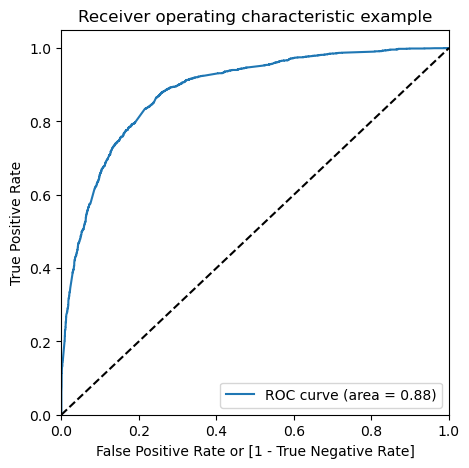

In [4494]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

### Finding Optimal Cutoff Point

-Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [4498]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.343866,3441,0,1,1,1,1,0,0,0,0,0,0
1,1,0.662531,9003,1,1,1,1,1,1,1,1,0,0,0
2,0,0.092808,7155,0,1,0,0,0,0,0,0,0,0,0
3,1,0.330151,1549,0,1,1,1,1,0,0,0,0,0,0
4,0,0.133496,557,0,1,1,0,0,0,0,0,0,0,0


In [4500]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379939  1.000000  0.000000
0.1   0.1  0.613982  0.973895  0.393447
0.2   0.2  0.762118  0.914947  0.668473
0.3   0.3  0.794273  0.870737  0.747420
0.4   0.4  0.810910  0.758737  0.842879
0.5   0.5  0.810910  0.693053  0.883127
0.6   0.6  0.801472  0.624421  0.909959
0.7   0.7  0.778116  0.510316  0.942208
0.8   0.8  0.758599  0.419789  0.966202
0.9   0.9  0.709167  0.253053  0.988648


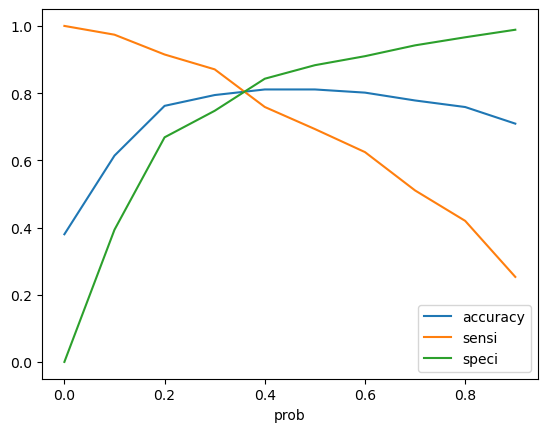

In [4502]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [4504]:
# Creating different label columns using different probability cutoffs between 0.3 and 0.4 as optimal cutoff in the chart is somewhere between 0.3 and 0.4

num= [float(x) for x in (0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4)]
for i in num:
    y_train_pred_final[i]=  y_train_pred_final.converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39
0,1,0.343866,3441,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0
1,1,0.662531,9003,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
2,0,0.092808,7155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.330151,1549,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
4,0,0.133496,557,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4506]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.

plot_df= pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

for n in num:
    TN,FP,FN,TP= confusion_matrix(y_true= y_train_pred_final.converted, y_pred= y_train_pred_final[n]).ravel()
    accuracy= (TN+TP)/float(TN+FP+FN+TP)
    specificity= TN / float(TN+FP)
    sensitivity= TP / float(TP+FN)
    plot_df.loc[n]= [n,accuracy,sensitivity,specificity]
    
plot_df

,prob,accuracy,sensitivity,specificity
0.30,0.30,0.794273,0.870737,0.747420
0.31,0.31,0.796193,0.866526,0.753096
0.32,0.32,0.796513,0.848842,0.764448
0.33,0.33,0.798432,0.841263,0.772188
0.34,0.34,0.801632,0.835368,0.780960
0.35,0.35,0.806591,0.793684,0.814499
0.36,0.36,0.808831,0.785684,0.823013
0.37,0.37,0.809790,0.780211,0.827915
0.38,0.38,0.811230,0.775158,0.833333
0.39,0.39,0.811870,0.767158,0.839267


#### From the above chart and table, we can see that 0.33 as optimal cutoff gives us good chance of predicting the leads coversion

In [4509]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_predicted
0,1,0.343866,3441,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1
1,1,0.662531,9003,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.092808,7155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.330151,1549,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1
4,0,0.133496,557,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4511]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted,y_train_pred_final.final_predicted )
confusion2

array([[2993,  883],
       [ 377, 1998]], dtype=int64)

In [4513]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [4515]:
# Let's check the overall accuracy.
print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ',TP / float(TP+FN))
# Let us calculate specificity
print('specificity:  ',TN / float(TN+FP)) 
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: ',FP/ float(TN+FP))
# positive predictive value 
print ('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value: ',TN / float(TN+ FN))

Accuracy:  0.8109102543593025
Sensitivity:  0.8412631578947368
specificity:   0.77218782249742
False Positive Rate:  0.22781217750257998
positive predictive value:  0.6935091981950712
Negative predictive value:  0.8881305637982195


In [4517]:
## Precision and Recall

In [4519]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[3423,  453],
       [ 729, 1646]], dtype=int64)

### Precision and Recall

##### Precision
TP / TP + FP

In [4523]:
print('precicsion: ',confusion[1,1]/(confusion[0,1]+confusion[1,1]))
print('Recall: ',confusion[1,1]/(confusion[1,0]+confusion[1,1]))

precicsion:  0.784182944259171
Recall:  0.6930526315789474


##### Recall
TP / TP + FN

In [4526]:
from sklearn.metrics import precision_score, recall_score

In [4528]:
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.784182944259171

In [4530]:
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.6930526315789474

### Precision and recall tradeoff

In [4533]:
from sklearn.metrics import precision_recall_curve

In [4535]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       1
 4       0
        ..
 6246    1
 6247    1
 6248    1
 6249    0
 6250    1
 Name: converted, Length: 6251, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6246    1
 6247    1
 6248    1
 6249    1
 6250    0
 Name: predicted, Length: 6251, dtype: int64)

In [4537]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_Prob)

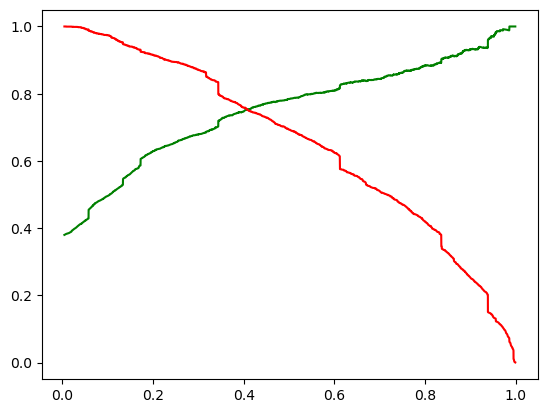

In [4539]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### In this Model, we choose to use confusion matrix and sensitivity and specificity to find the optimal cutoff.

## Create Lead score on train dataset

In [4543]:
y_train_pred_final.shape

(6251, 24)

In [4545]:
X_train.shape

(6251, 42)

In [4547]:
y_train_pred_final.head()

,converted,converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,final_predicted
0,1,0.343866,3441,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1
1,1,0.662531,9003,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.092808,7155,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.330151,1549,0,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1
4,0,0.133496,557,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4549]:
y_train_pred_final1=y_train_pred_final[['Prospect ID','converted','predicted','converted_Prob']]

In [4551]:
y_train_pred_final1['lead score']=(y_train_pred_final['converted_Prob']*100).round(0).astype(int)
y_train_pred_final1.head(5)

,Prospect ID,converted,predicted,converted_Prob,lead score
0,3441,1,0,0.343866,34
1,9003,1,1,0.662531,66
2,7155,0,0,0.092808,9
3,1549,1,0,0.330151,33
4,557,0,0,0.133496,13


### Making predictions on the test set

In [4554]:
X_test.head(5)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Unknown,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2317,0,0,3.0,998,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7589,0,0,1.0,1077,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7095,0,0,7.0,1058,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
935,0,0,3.0,911,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7979,0,0,3.0,1025,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [4556]:
#scaling the test data
X_test[['Total Time Spent on Website','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits']])

In [4558]:
#adding constant
X_test_sm = sm.add_constant(X_test)

In [4560]:
#cols in train dataset after feature selecion
col = X_train_sm.columns
col

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other Leads',
       'Lead Source_Olark Chat', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'current_occupation_Working Professional',
       'Specialization_Finance Management'],
      dtype='object')

In [4562]:
X_test_sm.head()

,const,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,mastering_the_interview,Lead Origin_Landing Page Submission,Lead Origin_Other Leads,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other sources,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Other activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,current_occupation_Housewife,current_occupation_Student,current_occupation_Unemployed,current_occupation_Unknown,current_occupation_Working Professional,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other specialization,Specialization_Supply Chain Management,City_Not Selected,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
2317,1.0,0,0,-0.064762,1.003278,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7589,1.0,0,0,-0.731145,1.152866,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7095,1.0,0,0,1.268005,1.116889,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
935,1.0,0,0,-0.064762,0.838542,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7979,1.0,0,0,-0.064762,1.054403,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [4564]:
#test dataset with only selected features
X_test_sm=X_test_sm[col]

In [4566]:
#prediction on the test data
y_test_pred = res.predict(X_test_sm)

In [4568]:
y_test_pred[:10]

2317    0.227419
7589    0.321142
7095    0.502611
935     0.452883
7979    0.817417
961     0.127130
92      0.048934
8695    0.020108
6003    0.474101
1362    0.377411
dtype: float64

In [4570]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [4572]:
# Let's see the head
y_pred_1.head()

,0
2317,0.227419
7589,0.321142
7095,0.502611
935,0.452883
7979,0.817417


In [4574]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [4576]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [4578]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [4580]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [4582]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2317,0.227419
1,0,7589,0.321142
2,1,7095,0.502611
3,1,935,0.452883
4,1,7979,0.817417


In [4584]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'converted_Prob'})

In [4586]:
y_pred_final.head()

,Converted,Prospect ID,converted_Prob
0,0,2317,0.227419
1,0,7589,0.321142
2,1,7095,0.502611
3,1,935,0.452883
4,1,7979,0.817417


In [4588]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Converted','Prospect ID','converted_Prob'])

In [4590]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,converted_Prob
0,0,2317,0.227419
1,0,7589,0.321142
2,1,7095,0.502611
3,1,935,0.452883
4,1,7979,0.817417


In [4592]:
#predicting if the leads will convert or not on test data using 0.33 as cutoff
y_pred_final['final_predicted'] = y_pred_final.converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [4594]:
y_pred_final.head()

,Converted,Prospect ID,converted_Prob,final_predicted
0,0,2317,0.227419,0
1,0,7589,0.321142,0
2,1,7095,0.502611,1
3,1,935,0.452883,1
4,1,7979,0.817417,1


## Model evaluation metrics for test data

In [4597]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1326,  363],
       [ 164,  826]], dtype=int64)

In [4599]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [4601]:
# Let's check the overall accuracy of test data
print('Accuracy: ',metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ',TP / float(TP+FN))
# Let us calculate specificity
print('specificity:  ',TN / float(TN+FP)) 
# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: ',FP/ float(TN+FP))
# positive predictive value 
print ('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print ('Negative predictive value: ',TN / float(TN+ FN))

Accuracy:  0.8032848077640911
Sensitivity:  0.8343434343434344
specificity:   0.7850799289520426
False Positive Rate:  0.21492007104795738
positive predictive value:  0.6947014297729184
Negative predictive value:  0.8899328859060402


## Lead Score on test data

In [4604]:
y_pred_final['lead score']=(y_pred_final['converted_Prob']*100).round(0).astype(int)
y_pred_final.head(5)

,Converted,Prospect ID,converted_Prob,final_predicted,lead score
0,0,2317,0.227419,0,23
1,0,7589,0.321142,0,32
2,1,7095,0.502611,1,50
3,1,935,0.452883,1,45
4,1,7979,0.817417,1,82


# 6. Insights and Recommendations

- Some of the key features that play a significant role in predicting lead conversion include current_occupation_Working Professional, Last Activity_SMS Sent, and Lead Origin_Other Leads.
- Leads originating from Reference sources are highly likely to convert, indicating the effectiveness of referral programs. X Education should invest in strengthening referral channels.-
Working professionals and businessmen show a higher conversion rate. X Education can tailor marketing and sales approaches to target these segments effectively.-
Leads with a specialization are more likely to convert which indicates leads having specialization are high interest leads. X education can target the leads having specialization-.
Total Time Spent on Website is a strong predictor of conversi
-X Education sales team can prioritize sales outreach to leads with high lead scores, focusing on those from high-converting sources.
n. 

# 7. Conclusion

- The model has 80% accuracy ,83% sensitivity and 78% specificity  on the test dataset. A lead score of 0-100 was assigned using the predicted probability to the leads.

- The model successfully predicts lead conversion with high accuracy, sensitivity, and specificity. By assigning a lead score to each prospect, X Education can prioritize the leads most likely to convert. The final model will help the sales teams to focus their efforts on the most promising leads, thereby optimizing the lead conversion process.
